<a href="https://colab.research.google.com/github/eemayes2/IE517MLF_Group_project/blob/main/Group_project_Regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
MLF_GP2_EconCycle = pd.read_csv('gdrive/MyDrive/IE 517_Group Project/Datasets/MLF_GP2_EconCycle.csv', sep = ',')
df = MLF_GP2_EconCycle.drop(['Date'], axis = 1)
df.head()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


<Figure size 1440x1152 with 0 Axes>

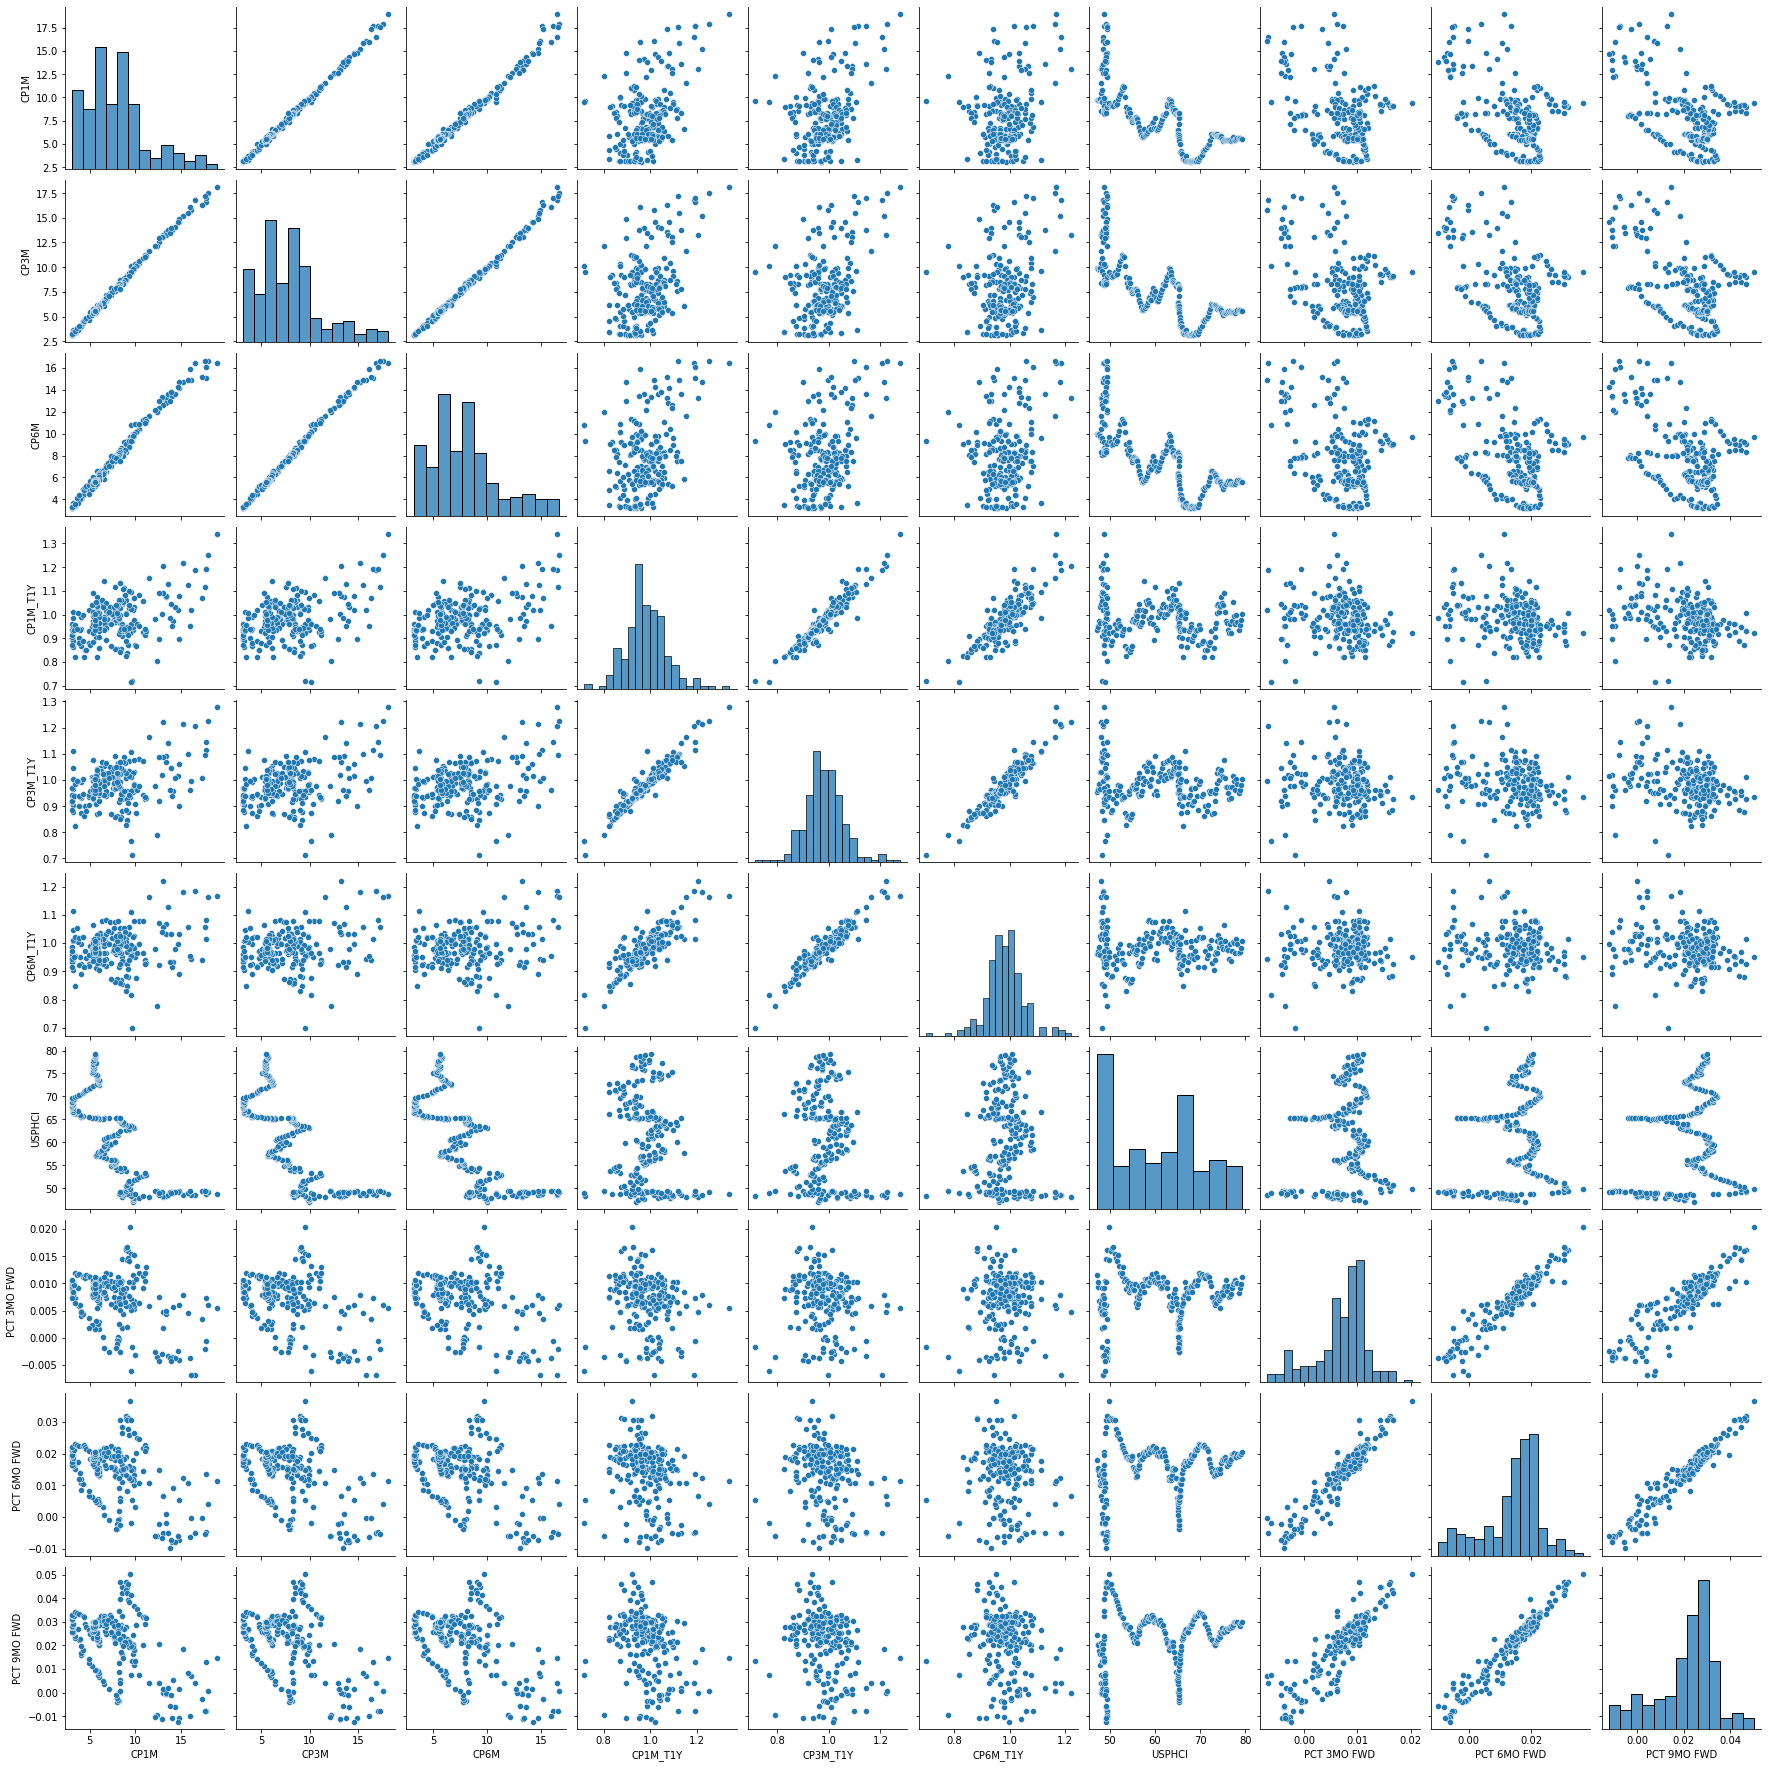

In [ ]:
plt.figure(figsize = (20,16))
sns.pairplot(df[df.columns.values[6:]])
plt.show()

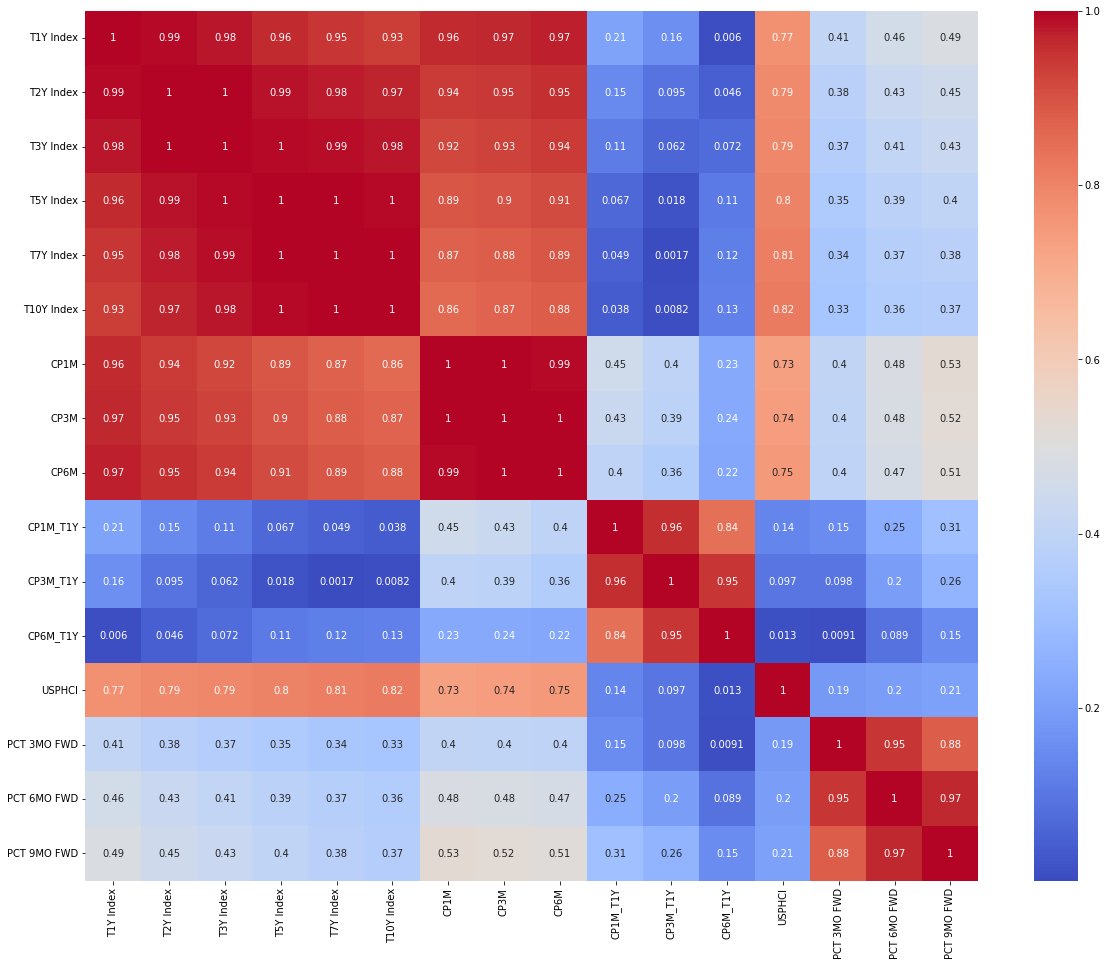

In [ ]:
# Plot the absolute value of the corr heatmap
corr_matrix = df.corr().abs()
plt.figure(figsize = (20,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

In [ ]:
# Identify X and y
X = df.iloc[:, 0:12].values
y_3MO = df['PCT 3MO FWD'].values.reshape(-1,1)
y_6MO = df['PCT 6MO FWD'].values.reshape(-1,1)
y_9MO = df['PCT 9MO FWD'].values.reshape(-1,1)

In [ ]:
X_sc = StandardScaler().fit_transform(X)

In [ ]:
selected1_X = X_sc[:, :6]
selected2_X = X_sc[:, 6:9]
selected3_X = X_sc[:, :9]
selected4_X = X_sc[:, 9:12]

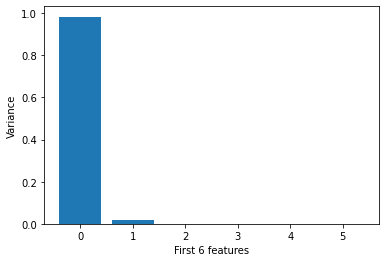

[[ 0.40224138  0.409634    0.41126447  0.41069945  0.40879935  0.40678306]
 [ 0.68505409  0.31219072  0.08612372 -0.20697155 -0.37808412 -0.48993441]
 [ 0.53477155 -0.28890931 -0.58784726 -0.21159882  0.08740076  0.48225869]
 [-0.20766541  0.46744592  0.14922035 -0.76866563  0.005932    0.35386528]
 [ 0.14007565 -0.56436457  0.637058   -0.12231363 -0.38875096  0.29990101]
 [-0.14204243  0.3380167  -0.22309241  0.3713586  -0.72878948  0.38308892]]
0.9999999999999999


In [ ]:
pca = PCA(n_components=None)
X_PCA1 = pca.fit_transform(selected1_X)
X_features1 = range(pca.n_components_)
exp_var_pca1 = pca.explained_variance_ratio_

plt.bar(X_features1, exp_var_pca1)
plt.xlabel('First 6 features')
plt.ylabel('Variance')
plt.show()
print(pca.components_)
print(np.sum(exp_var_pca1))

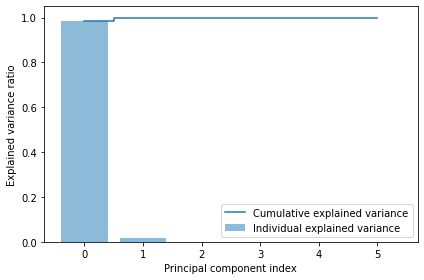

In [ ]:
# Visualize the variance explained by each principal component.
cum_sum_eigenvalues1 = np.cumsum(exp_var_pca1)

plt.bar(range(0,len(exp_var_pca1)), exp_var_pca1, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues1)), cum_sum_eigenvalues1, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

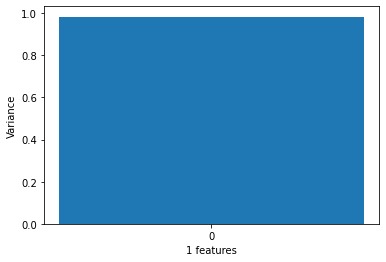

[[0.40224138 0.409634   0.41126447 0.41069945 0.40879935 0.40678306]]
0.9837638849979494


In [ ]:
pca1 = PCA(n_components=1)
X_PCA2 = pca1.fit_transform(selected1_X)

X_axis=['0']
plt.bar(X_axis, pca1.explained_variance_ratio_)
plt.xlabel('1 features')
plt.ylabel('Variance')
plt.show()
print(pca1.components_)
print(np.sum(pca1.explained_variance_ratio_))

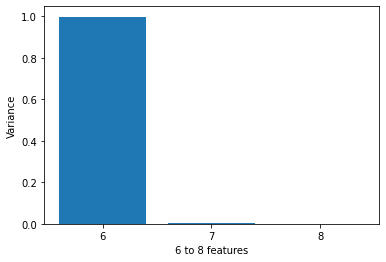

[[ 0.57708311  0.57797176  0.57699543]
 [ 0.68995972  0.03297588 -0.72309624]
 [-0.43695614  0.81539023 -0.37974741]]
1.0


In [ ]:
pca = PCA(n_components=None)
X_PCA3 = pca.fit_transform(selected2_X)
exp_var_pca3 = pca.explained_variance_ratio_

X_axis=['6', '7', '8']
plt.bar(X_axis, exp_var_pca3)
plt.xlabel('6 to 8 features')
plt.ylabel('Variance')
plt.show()
print(pca.components_)
print(np.sum(exp_var_pca3))

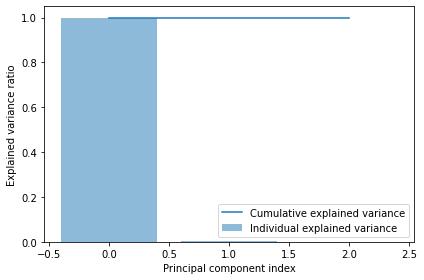

In [ ]:
# Visualize the variance explained by each principal component.
cum_sum_eigenvalues3 = np.cumsum(exp_var_pca3)

plt.bar(range(0,len(exp_var_pca3)), exp_var_pca3, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues3)), cum_sum_eigenvalues3, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

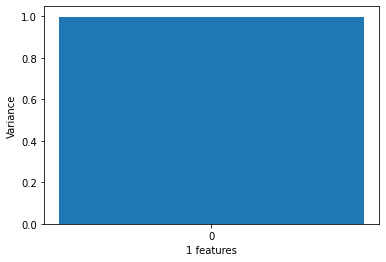

[[0.57708311 0.57797176 0.57699543]]
0.9977177579219978


In [ ]:
pca1 = PCA(n_components=1)
X_PCA4 = pca1.fit_transform(selected2_X)


X_axis=['0']
plt.bar(X_axis, pca1.explained_variance_ratio_)
plt.xlabel('1 features')
plt.ylabel('Variance')
plt.show()
print(pca1.components_)
print(np.sum(pca1.explained_variance_ratio_))

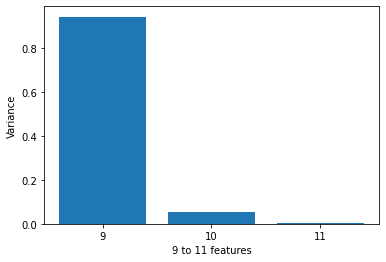

[[-0.57124712 -0.59240042 -0.56810076]
 [ 0.68216765  0.04222384 -0.72997565]
 [-0.45642527  0.80453645 -0.37999616]]
1.0


In [ ]:
pca = PCA(n_components=None)
X_PCA5 = pca.fit_transform(selected4_X)
exp_var_pca5 = pca.explained_variance_ratio_

X_axis=['9', '10', '11']
plt.bar(X_axis, exp_var_pca5)
plt.xlabel('9 to 11 features')
plt.ylabel('Variance')
plt.show()
print(pca.components_)
print(np.sum(exp_var_pca5))

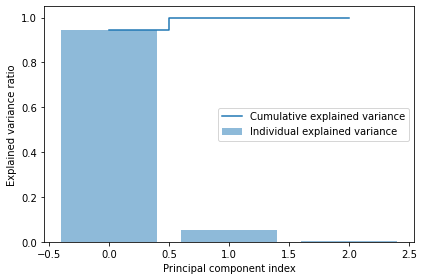

In [ ]:
# Visualize the variance explained by each principal component.
cum_sum_eigenvalues5 = np.cumsum(exp_var_pca5)

plt.bar(range(0,len(exp_var_pca5)), exp_var_pca5, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues5)), cum_sum_eigenvalues5, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

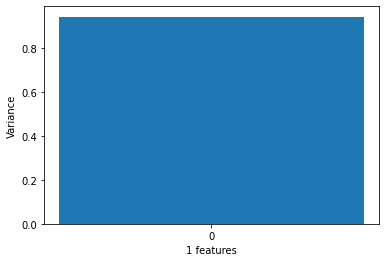

[[-0.57124712 -0.59240042 -0.56810076]]
0.9448344934647822


In [ ]:
pca1 = PCA(n_components=1)
X_PCA6 = pca1.fit_transform(selected4_X)

X_axis=['0']
plt.bar(X_axis, pca1.explained_variance_ratio_)
plt.xlabel('1 features')
plt.ylabel('Variance')
plt.show()
print(pca1.components_)
print(np.sum(pca1.explained_variance_ratio_))

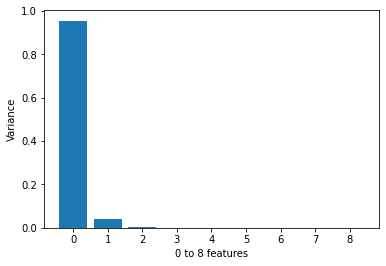

[[ 0.33811877  0.33971641  0.33859054  0.33504146  0.33189286  0.32928501
   0.3269827   0.32889807  0.33120839]
 [ 0.10049334 -0.0810678  -0.18197268 -0.30790598 -0.37409668 -0.41427031
   0.4585686   0.43364617  0.38145324]
 [ 0.64899531  0.41463226  0.22393739 -0.05087334 -0.25118993 -0.40012029
  -0.23930393 -0.21397681 -0.16704506]
 [ 0.11752599 -0.03908713 -0.03700582  0.01328089  0.01158702  0.0505036
   0.65959858 -0.03087205 -0.73783858]
 [ 0.5900886  -0.21864822 -0.59634568 -0.18880409  0.06742908  0.43313893
  -0.13634546  0.0189241   0.04011275]
 [-0.19221616  0.48282564  0.12733907 -0.7642556   0.00316279  0.35787879
   0.02359773 -0.00804126 -0.03036009]
 [ 0.15021688 -0.5011191   0.56695488 -0.0890261  -0.48519868  0.37038096
   0.03914259 -0.1290254   0.07855914]
 [-0.00181031 -0.06893447  0.13340198 -0.01310288 -0.06110788  0.02795003
  -0.41203656  0.79964879 -0.40441228]
 [-0.18124434  0.40960115 -0.29941221  0.40292146 -0.66555206  0.32195468
   0.00269774  0.023008

In [ ]:
pca = PCA(n_components=None)
X_PCA7 = pca.fit_transform(selected3_X)
exp_var_pca7 = pca.explained_variance_ratio_

X_axis=['0', '1', '2', '3', '4', '5', '6', '7', '8']
plt.bar(X_axis, exp_var_pca7)
plt.xlabel('0 to 8 features')
plt.ylabel('Variance')
plt.show()
print(pca.components_)
print(np.sum(exp_var_pca7))

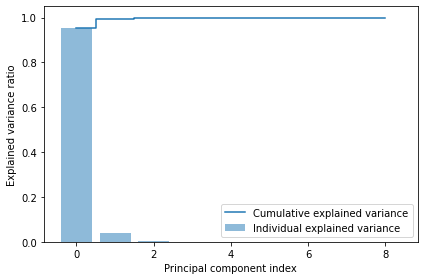

In [ ]:
# Visualize the variance explained by each principal component.
cum_sum_eigenvalues7 = np.cumsum(exp_var_pca7)

plt.bar(range(0,len(exp_var_pca7)), exp_var_pca7, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues7)), cum_sum_eigenvalues7, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

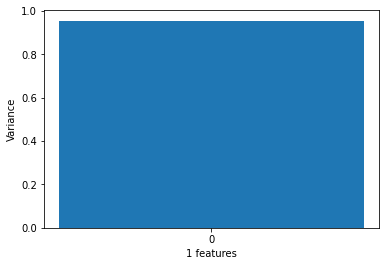

[[0.33811877 0.33971641 0.33859054 0.33504146 0.33189286 0.32928501
  0.3269827  0.32889807 0.33120839]]
0.9552679119088114


In [ ]:
pca1 = PCA(n_components=1)
X_PCA8 = pca1.fit_transform(selected3_X)

X_axis=['0']
plt.bar(X_axis, pca1.explained_variance_ratio_)
plt.xlabel('1 features')
plt.ylabel('Variance')
plt.show()
print(pca1.components_)
print(np.sum(pca1.explained_variance_ratio_))

In [ ]:
df_new_feature = pd.DataFrame(X_PCA2, columns=['new_component'])
print(df_new_feature)
df_New = df.assign(new_component=df_new_feature.values)
df_New =df_New.drop(['T1Y Index', 'T2Y Index','T3Y Index', 'T5Y Index', 'T7Y Index', 'T10Y Index', 'USPHCI', 'PCT 3MO FWD', 'PCT 6MO FWD', 'PCT 9MO FWD'], axis = 1)
df_New.head()

     new_component
0         0.733008
1         0.645448
2         0.690264
3         0.707025
4         0.718892
..             ...
218      -2.033396
219      -1.842215
220      -2.000671
221      -2.174767
222      -2.384070

[223 rows x 1 columns]


,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,new_component
0,9.75,9.95,10.01,0.936599,0.955812,0.961575,0.733008
1,9.74,9.90,9.96,0.951172,0.966797,0.972656,0.645448
2,9.72,9.85,9.87,0.948293,0.960976,0.962927,0.690264
3,9.86,9.95,9.98,0.974308,0.983202,0.986166,0.707025
4,9.77,9.76,9.71,0.965415,0.964427,0.959486,0.718892


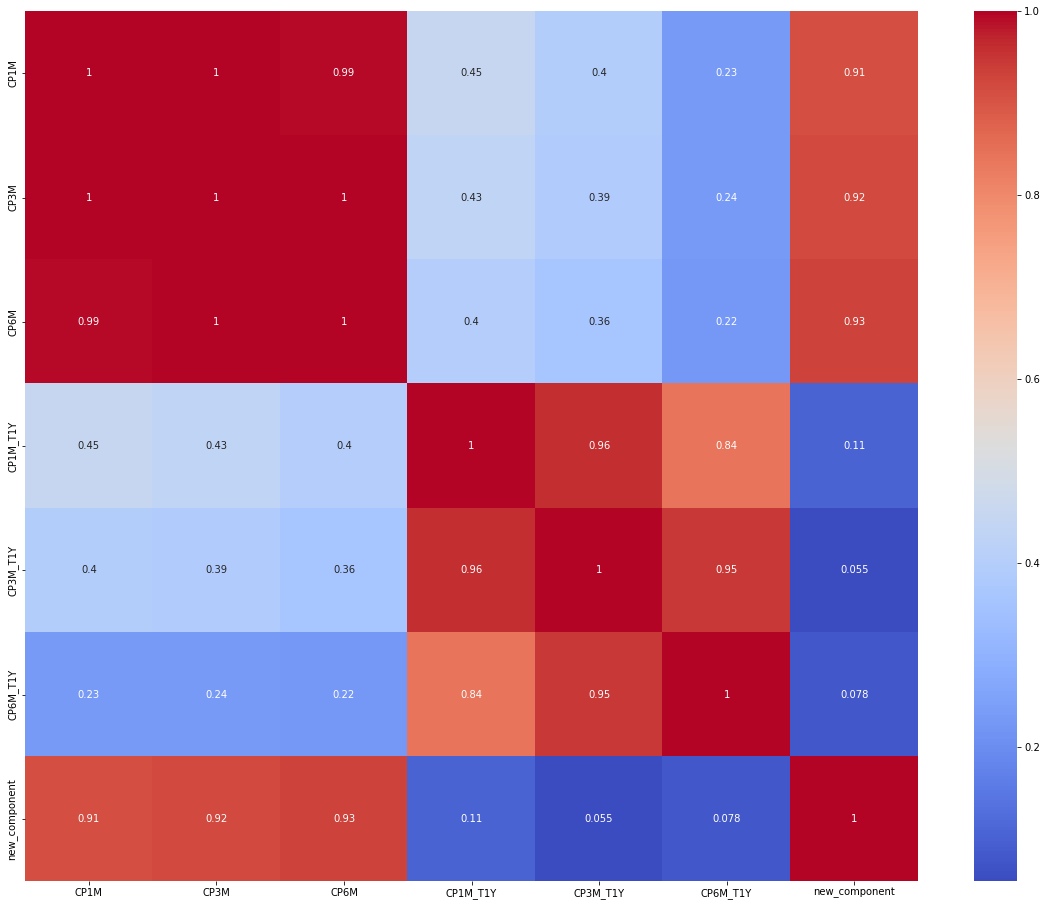

In [ ]:
corr_matrix = df_New.corr().abs()
plt.figure(figsize = (20,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
X_new = df_New
X_train_3MO, X_test_3MO, y_train_3MO, y_test_3MO = train_test_split(X_new, y_3MO, test_size = 0.3, random_state = 43)
X_train_6MO, X_test_6MO, y_train_6MO, y_test_6MO = train_test_split(X_new, y_6MO, test_size = 0.3, random_state = 43)
X_train_9MO, X_test_9MO, y_train_9MO, y_test_9MO = train_test_split(X_new, y_9MO, test_size = 0.3, random_state = 43)

In [ ]:
scaler = StandardScaler()
X_train_3MO = scaler.fit_transform(X_train_3MO)
X_test_3MO = scaler.transform(X_test_3MO)
X_train_6MO = scaler.fit_transform(X_train_6MO)
X_test_6MO = scaler.transform(X_test_6MO)
X_train_9MO = scaler.fit_transform(X_train_9MO)
X_test_9MO = scaler.transform(X_test_9MO)

# Linear regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_3MO, y_train_3MO)
lr.fit(X_train_6MO, y_train_6MO)
lr.fit(X_train_9MO, y_train_9MO)

lr_pred__3MO = lr.predict(X_test_3MO)
lr_pred__6MO = lr.predict(X_test_6MO)
lr_pred__9MO = lr.predict(X_test_9MO)

In [ ]:
lr_train_MSE_3MO = mean_squared_error(y_train_3MO, lr.predict(X_train_3MO))
lr_test_MSE_3MO = mean_squared_error(y_test_3MO, lr_pred__3MO)
lr_train_r2_3MO = r2_score(y_train_3MO, lr.predict(X_train_3MO))
lr_test_r2_3MO = r2_score(y_test_3MO, lr_pred__3MO)

lr_train_MSE_6MO = mean_squared_error(y_train_6MO, lr.predict(X_train_6MO))
lr_test_MSE_6MO = mean_squared_error(y_test_6MO, lr_pred__6MO)
lr_train_r2_6MO = r2_score(y_train_6MO, lr.predict(X_train_6MO))
lr_test_r2_6MO = r2_score(y_test_6MO, lr_pred__6MO)

lr_train_MSE_9MO = mean_squared_error(y_train_9MO, lr.predict(X_train_9MO))
lr_test_MSE_9MO = mean_squared_error(y_test_9MO, lr_pred__9MO)
lr_train_r2_9MO = r2_score(y_train_9MO, lr.predict(X_train_9MO))
lr_test_r2_9MO = r2_score(y_test_9MO, lr_pred__9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % lr_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % lr_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % lr_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % lr_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % lr_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % lr_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % lr_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % lr_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % lr_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % lr_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % lr_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % lr_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0002394889
Coefficient of determination for 3MO train set: -10.137
Mean Squared Error for 3MO test set: 0.0002743765
Coefficient of determination for 3MO test set: -9.121
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0001076305
Coefficient of determination for 6MO train set: -0.435
Mean Squared Error for 6MO test set: 0.0001614752
Coefficient of determination for 6MO test set: -0.583
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0001091119
Coefficient of determination for 9MO train set: 0.334
Mean Squared Error for 9MO test set: 0.0001527810
Coefficient of determination for 9MO test set: 0.159
-----------------------------------------


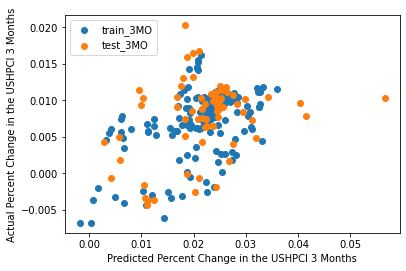

In [ ]:
# To check model performance
plt.scatter(lr.predict(X_train_3MO), y_train_3MO, label='train_3MO')
plt.scatter(lr_pred__3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

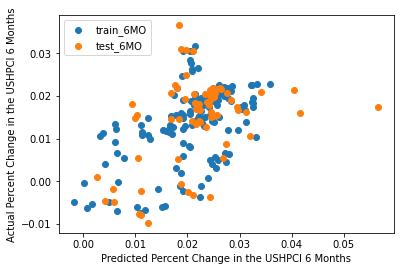

In [ ]:
# To check model performance
plt.scatter(lr.predict(X_train_6MO), y_train_6MO, label='train_6MO')
plt.scatter(lr_pred__6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

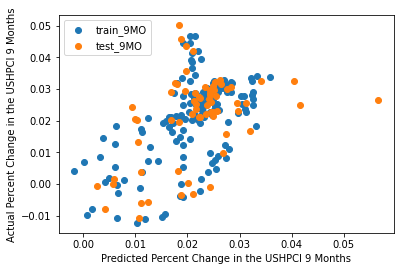

In [ ]:
# To check model performance
plt.scatter(lr.predict(X_train_9MO), y_train_9MO, label='train_9MO')
plt.scatter(lr_pred__9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

# Polynomial regression

In [ ]:
poly = PolynomialFeatures(degree=3)
X_train_poly_3MO = poly.fit_transform(X_train_3MO)
X_test_poly_3MO = poly.fit_transform(X_test_3MO)
X_train_poly_6MO = poly.fit_transform(X_train_6MO)
X_test_poly_6MO = poly.fit_transform(X_test_6MO)
X_train_poly_9MO = poly.fit_transform(X_train_9MO)
X_test_poly_9MO = poly.fit_transform(X_test_9MO)


In [ ]:
poly_lr = LinearRegression()
# Fit
poly_lr.fit(X_train_poly_3MO, y_train_3MO)
poly_lr.fit(X_train_poly_6MO, y_train_6MO)
poly_lr.fit(X_train_poly_9MO, y_train_9MO)
# Predict
poly_lr_pred__3MO = poly_lr.predict(X_test_poly_3MO)
poly_lr_pred__6MO = poly_lr.predict(X_test_poly_6MO)
poly_lr_pred__9MO = poly_lr.predict(X_test_poly_9MO)

In [ ]:
poly_lr_train_MSE_3MO = mean_squared_error(y_train_3MO, poly_lr.predict(X_train_poly_3MO))
poly_lr_test_MSE_3MO = mean_squared_error(y_test_3MO, poly_lr_pred__3MO)
poly_lr_train_r2_3MO = r2_score(y_train_3MO, poly_lr.predict(X_train_poly_3MO))
poly_lr_test_r2_3MO = r2_score(y_test_3MO, poly_lr_pred__3MO)

poly_lr_train_MSE_6MO = mean_squared_error(y_train_6MO, poly_lr.predict(X_train_poly_6MO))
poly_lr_test_MSE_6MO = mean_squared_error(y_test_6MO, poly_lr_pred__6MO)
poly_lr_train_r2_6MO = r2_score(y_train_6MO, poly_lr.predict(X_train_poly_6MO))
poly_lr_test_r2_6MO = r2_score(y_test_6MO, poly_lr_pred__6MO)

poly_lr_train_MSE_9MO = mean_squared_error(y_train_9MO, poly_lr.predict(X_train_poly_9MO))
poly_lr_test_MSE_9MO = mean_squared_error(y_test_9MO, poly_lr_pred__9MO)
poly_lr_train_r2_9MO = r2_score(y_train_9MO, poly_lr.predict(X_train_poly_9MO))
poly_lr_test_r2_9MO = r2_score(y_test_9MO, poly_lr_pred__9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % poly_lr_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % poly_lr_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % poly_lr_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % poly_lr_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % poly_lr_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % poly_lr_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % poly_lr_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % poly_lr_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % poly_lr_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % poly_lr_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % poly_lr_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % poly_lr_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0002760553
Coefficient of determination for 3MO train set: -11.837
Mean Squared Error for 3MO test set: 5.8915392736
Coefficient of determination for 3MO test set: -217313.308
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0000763288
Coefficient of determination for 6MO train set: -0.018
Mean Squared Error for 6MO test set: 5.8862790016
Coefficient of determination for 6MO test set: -57700.543
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0000137186
Coefficient of determination for 9MO train set: 0.916
Mean Squared Error for 9MO test set: 5.8801810169
Coefficient of determination for 9MO test set: -32374.110
-----------------------------------------


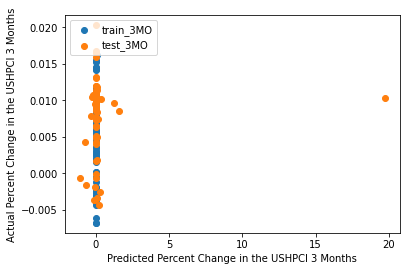

In [ ]:
# To check model performance
plt.scatter(poly_lr.predict(X_train_poly_3MO), y_train_3MO, label='train_3MO')
plt.scatter(poly_lr_pred__3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

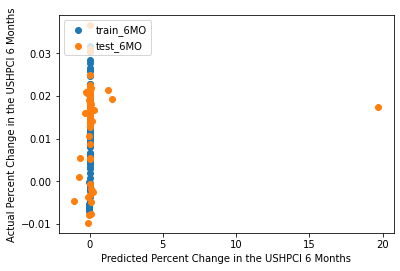

In [ ]:
# To check model performance
plt.scatter(poly_lr.predict(X_train_poly_6MO), y_train_6MO, label='train_6MO')
plt.scatter(poly_lr_pred__6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

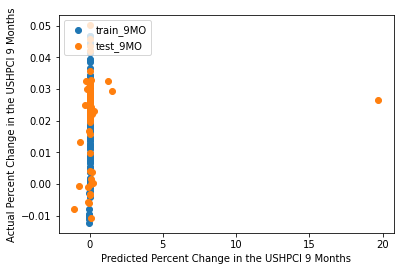

In [ ]:
# To check model performance
plt.scatter(poly_lr.predict(X_train_poly_9MO), y_train_9MO, label='train_9MO')
plt.scatter(poly_lr_pred__9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

# Ridge regression

In [ ]:
ridge_3MO = Ridge(alpha = 0.5, random_state = 43).fit(X_train_3MO, y_train_3MO)
ridge_pred_3MO = ridge_3MO.predict(X_test_3MO)
ridge_6MO = Ridge(alpha = 0.5, random_state = 43).fit(X_train_6MO, y_train_6MO)
ridge_pred_6MO = ridge_6MO.predict(X_test_6MO)
ridge_9MO = Ridge(alpha = 0.5, random_state = 43).fit(X_train_9MO, y_train_9MO)
ridge_pred_9MO = ridge_9MO.predict(X_test_9MO)

In [ ]:
ridge_train_MSE_3MO = mean_squared_error(y_train_3MO, ridge_3MO.predict(X_train_3MO))
ridge_test_MSE_3MO = mean_squared_error(y_test_3MO, ridge_pred_3MO)
ridge_train_r2_3MO = r2_score(y_train_3MO, ridge_3MO.predict(X_train_3MO))
ridge_test_r2_3MO = r2_score(y_test_3MO, ridge_pred_3MO)

ridge_train_MSE_6MO = mean_squared_error(y_train_6MO, ridge_6MO.predict(X_train_6MO))
ridge_test_MSE_6MO = mean_squared_error(y_test_6MO, ridge_pred_6MO)
ridge_train_r2_6MO = r2_score(y_train_6MO, ridge_6MO.predict(X_train_6MO))
ridge_test_r2_6MO = r2_score(y_test_6MO, ridge_pred_6MO)

ridge_train_MSE_9MO = mean_squared_error(y_train_9MO, ridge_9MO.predict(X_train_9MO))
ridge_test_MSE_9MO = mean_squared_error(y_test_9MO, ridge_pred_9MO)
ridge_train_r2_9MO = r2_score(y_train_9MO, ridge_3MO.predict(X_train_9MO))
ridge_test_r2_9MO = r2_score(y_test_9MO, ridge_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.6f' % ridge_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % ridge_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.6f' % ridge_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % ridge_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.6f' % ridge_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % ridge_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.6f' % ridge_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % ridge_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.6f' % ridge_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % ridge_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.6f' % ridge_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % ridge_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.000016
Coefficient of determination for 3MO train set: 0.256
Mean Squared Error for 3MO test set: 0.000026
Coefficient of determination for 3MO test set: 0.044
-----------------------------------------
Mean Squared Error for 6MO train set: 0.000054
Coefficient of determination for 6MO train set: 0.280
Mean Squared Error for 6MO test set: 0.000082
Coefficient of determination for 6MO test set: 0.198
-----------------------------------------
Mean Squared Error for 9MO train set: 0.000111
Coefficient of determination for 9MO train set: -1.047
Mean Squared Error for 9MO test set: 0.000135
Coefficient of determination for 9MO test set: 0.256
-----------------------------------------


In [ ]:
# Using grid search cross validation to select the best alpha
parameters_ridge = {'alpha':list(np.arange(0.001, 1, 0.005))}

ridge = Ridge(random_state = 'SEED')
ridge_cv_3MO = GridSearchCV(ridge, parameters_ridge, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_3MO, y_train_3MO)
ridge_cv_6MO = GridSearchCV(ridge, parameters_ridge, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_6MO, y_train_6MO)
ridge_cv_9MO = GridSearchCV(ridge, parameters_ridge, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_9MO, y_train_9MO)

In [ ]:
# Cross val score
train_cv_scores_3MO = cross_val_score(ridge_cv_3MO, X_train_3MO, y_train_3MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_3MO = cross_val_score(ridge_cv_3MO, X_test_3MO, y_test_3MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_6MO = cross_val_score(ridge_cv_6MO, X_train_6MO, y_train_6MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_6MO = cross_val_score(ridge_cv_6MO, X_test_6MO, y_test_6MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_9MO = cross_val_score(ridge_cv_9MO, X_train_9MO, y_train_9MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_9MO = cross_val_score(ridge_cv_9MO, X_test_9MO, y_test_9MO, scoring = 'r2', cv=5, n_jobs=-1)

In [ ]:
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_3MO), np.std(train_cv_scores_3MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_3MO), np.std(test_cv_scores_3MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_6MO), np.std(train_cv_scores_6MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_6MO), np.std(test_cv_scores_6MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_9MO), np.std(train_cv_scores_9MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_9MO), np.std(test_cv_scores_9MO)))

The CV accuracy scores for the train set is: [ 0.36407769 -0.02426463  0.21689505  0.11883786  0.00295474]
The mean/standard deviation of CV accuracy score for the train set is: 0.136 +/- 0.143
The CV accuracy scores for the test set is: [ 0.40242347  0.42023962  0.26151581 -0.41997112 -0.28932786]
The mean/standard deviation of CV accuracy score for the test set is: 0.075 +/- 0.357
-----------------------------------------
The CV accuracy scores for the train set is: [0.32937337 0.03196774 0.22270096 0.28203373 0.09927218]
The mean/standard deviation of CV accuracy score for the train set is: 0.193 +/- 0.111
The CV accuracy scores for the test set is: [ 0.56305835  0.32041173  0.39151553  0.08784681 -0.10098848]
The mean/standard deviation of CV accuracy score for the test set is: 0.252 +/- 0.233
-----------------------------------------
The CV accuracy scores for the train set is: [0.32884439 0.12569834 0.28479556 0.39113637 0.17289461]
The mean/standard deviation of CV accuracy scor

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(ridge_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(ridge_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(ridge_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(ridge_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(ridge_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(ridge_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is 0.1706
The best parameters for 3MO is {'alpha': 0.001}
-----------------------------------------
The best training R-Squared score for 6MO is 0.2125
The best parameters for 6MO is {'alpha': 0.001}
-----------------------------------------
The best training R-Squared score for 9MO is 0.2685
The best parameters for 9MO is {'alpha': 0.066}
-----------------------------------------


In [ ]:
ridge_3MO = Ridge(alpha = 0.001, random_state = 'SEED').fit(X_train_3MO, y_train_3MO)
ridge_pred_3MO = ridge_3MO.predict(X_test_3MO)
ridge_6MO = Ridge(alpha = 0.001, random_state = 'SEED').fit(X_train_6MO, y_train_6MO)
ridge_pred_6MO = ridge_6MO.predict(X_test_6MO)
ridge_9MO = Ridge(alpha = 0.066, random_state = 'SEED').fit(X_train_9MO, y_train_9MO)
ridge_pred_9MO = ridge_9MO.predict(X_test_9MO)

In [ ]:
ridge_train_MSE_3MO = mean_squared_error(y_train_3MO, ridge_3MO.predict(X_train_3MO))
ridge_test_MSE_3MO = mean_squared_error(y_test_3MO, ridge_pred_3MO)
ridge_train_r2_3MO = r2_score(y_train_3MO, ridge_3MO.predict(X_train_3MO))
ridge_test_r2_3MO = r2_score(y_test_3MO, ridge_pred_3MO)

ridge_train_MSE_6MO = mean_squared_error(y_train_6MO, ridge_6MO.predict(X_train_6MO))
ridge_test_MSE_6MO = mean_squared_error(y_test_6MO, ridge_pred_6MO)
ridge_train_r2_6MO = r2_score(y_train_6MO, ridge_6MO.predict(X_train_6MO))
ridge_test_r2_6MO = r2_score(y_test_6MO, ridge_pred_6MO)

ridge_train_MSE_9MO = mean_squared_error(y_train_9MO, ridge_9MO.predict(X_train_9MO))
ridge_test_MSE_9MO = mean_squared_error(y_test_9MO, ridge_pred_9MO)
ridge_train_r2_9MO = r2_score(y_train_9MO, ridge_3MO.predict(X_train_9MO))
ridge_test_r2_9MO = r2_score(y_test_9MO, ridge_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % ridge_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % ridge_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % ridge_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % ridge_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % ridge_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % ridge_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % ridge_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % ridge_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % ridge_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % ridge_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % ridge_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % ridge_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0000145617
Coefficient of determination for 3MO train set: 0.323
Mean Squared Error for 3MO test set: 0.0000323773
Coefficient of determination for 3MO test set: -0.194
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0000518481
Coefficient of determination for 6MO train set: 0.309
Mean Squared Error for 6MO test set: 0.0000956840
Coefficient of determination for 6MO test set: 0.062
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0001094080
Coefficient of determination for 9MO train set: -1.039
Mean Squared Error for 9MO test set: 0.0001434630
Coefficient of determination for 9MO test set: 0.210
-----------------------------------------


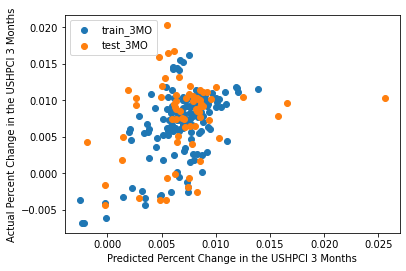

In [ ]:
# To check model performance
plt.scatter(ridge_3MO.predict(X_train_3MO), y_train_3MO, label='train_3MO')
plt.scatter(ridge_pred_3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

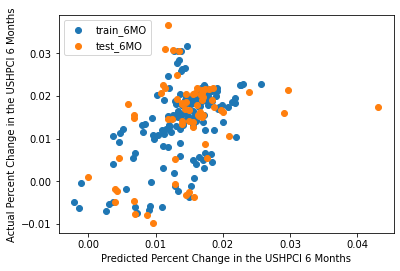

In [ ]:
# To check model performance
plt.scatter(ridge_6MO.predict(X_train_6MO), y_train_6MO, label='train_6MO')
plt.scatter(ridge_pred_6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

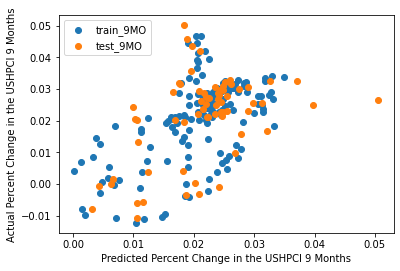

In [ ]:
# To check model performance
plt.scatter(ridge_9MO.predict(X_train_9MO), y_train_9MO, label='train_9MO')
plt.scatter(ridge_pred_9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

# Elastic Net

In [ ]:
en_3MO = ElasticNet(alpha = 0.05, l1_ratio = 1, random_state = 43).fit(X_train_3MO, y_train_3MO)
en_pred_3MO = en_3MO.predict(X_test_3MO)
en_6MO = ElasticNet(alpha = 0.05, l1_ratio = 1, random_state = 43).fit(X_train_6MO, y_train_6MO)
en_pred_6MO = en_6MO.predict(X_test_6MO)
en_9MO = ElasticNet(alpha = 0.05, l1_ratio = 1, random_state = 43).fit(X_train_9MO, y_train_9MO)
en_pred_9MO = en_9MO.predict(X_test_9MO)

In [ ]:
en_train_MSE_3MO = mean_squared_error(y_train_3MO, en_3MO.predict(X_train_3MO))
en_test_MSE_3MO = mean_squared_error(y_test_3MO, en_pred_3MO)
en_train_r2_3MO = r2_score(y_train_3MO, en_3MO.predict(X_train_3MO))
en_test_r2_3MO = r2_score(y_test_3MO, en_pred_3MO)

en_train_MSE_6MO = mean_squared_error(y_train_6MO, en_6MO.predict(X_train_6MO))
en_test_MSE_6MO = mean_squared_error(y_test_6MO, en_pred_6MO)
en_train_r2_6MO = r2_score(y_train_6MO, en_6MO.predict(X_train_6MO))
en_test_r2_6MO = r2_score(y_test_6MO, en_pred_6MO)

en_train_MSE_9MO = mean_squared_error(y_train_9MO, en_9MO.predict(X_train_9MO))
en_test_MSE_9MO = mean_squared_error(y_test_9MO, en_pred_9MO)
en_train_r2_9MO = r2_score(y_train_9MO, en_9MO.predict(X_train_9MO))
en_test_r2_9MO = r2_score(y_test_9MO, en_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % en_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % en_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % en_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % en_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % en_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % en_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % en_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % en_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % en_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % en_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % en_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % en_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0000215043
Coefficient of determination for 3MO train set: 0.000
Mean Squared Error for 3MO test set: 0.0000276982
Coefficient of determination for 3MO test set: -0.022
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0000749862
Coefficient of determination for 6MO train set: 0.000
Mean Squared Error for 6MO test set: 0.0001020359
Coefficient of determination for 6MO test set: -0.000
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0001637736
Coefficient of determination for 9MO train set: 0.000
Mean Squared Error for 9MO test set: 0.0001819642
Coefficient of determination for 9MO test set: -0.002
-----------------------------------------


In [ ]:
# Using grid search cross validation to select the best alpha
parameters_en = {'alpha': list(np.arange(0.001, 0.5, 0.02)),
           'l1_ratio': list(np.arange(0.001, 1, 0.02))}
en = ElasticNet(random_state = 43)
en_cv_3MO = GridSearchCV(en, parameters_en, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_3MO, y_train_3MO)
en_cv_6MO = GridSearchCV(en, parameters_en, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_6MO, y_train_6MO)
en_cv_9MO = GridSearchCV(en, parameters_en, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_9MO, y_train_9MO)

In [ ]:
# Cross val score
train_cv_scores_3MO = cross_val_score(en_cv_3MO, X_train_3MO, y_train_3MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_3MO = cross_val_score(en_cv_3MO, X_test_3MO, y_test_3MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_6MO = cross_val_score(en_cv_6MO, X_train_6MO, y_train_6MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_6MO = cross_val_score(en_cv_6MO, X_test_6MO, y_test_6MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_9MO = cross_val_score(en_cv_9MO, X_train_9MO, y_train_9MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_9MO = cross_val_score(en_cv_9MO, X_test_9MO, y_test_9MO, scoring = 'r2', cv=5, n_jobs=-1)

In [ ]:
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_3MO), np.std(train_cv_scores_3MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_3MO), np.std(test_cv_scores_3MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_6MO), np.std(train_cv_scores_6MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_6MO), np.std(test_cv_scores_6MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_9MO), np.std(train_cv_scores_9MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_9MO), np.std(test_cv_scores_9MO)))

The CV accuracy scores for the train set is: [ 0.21537309 -0.02734603  0.19376039 -0.03522453  0.13405492]
The mean/standard deviation of CV accuracy score for the train set is: 0.096 +/- 0.107
The CV accuracy scores for the test set is: [ 0.28802599  0.3892591   0.20171686 -0.19605823 -0.40081437]
The mean/standard deviation of CV accuracy score for the test set is: 0.056 +/- 0.303
-----------------------------------------
The CV accuracy scores for the train set is: [0.25044282 0.03072303 0.19498643 0.25820604 0.14911583]
The mean/standard deviation of CV accuracy score for the train set is: 0.177 +/- 0.083
The CV accuracy scores for the test set is: [ 0.44968767  0.49208257  0.32705783  0.11168764 -0.30079242]
The mean/standard deviation of CV accuracy score for the test set is: 0.216 +/- 0.290
-----------------------------------------
The CV accuracy scores for the train set is: [0.32833794 0.13326285 0.26910804 0.31124134 0.19239611]
The mean/standard deviation of CV accuracy scor

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(en_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(en_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(en_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(en_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(en_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(en_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is 0.1295
The best parameters for 3MO is {'alpha': 0.001, 'l1_ratio': 0.021}
-----------------------------------------
The best training R-Squared score for 6MO is 0.2023
The best parameters for 6MO is {'alpha': 0.001, 'l1_ratio': 0.021}
-----------------------------------------
The best training R-Squared score for 9MO is 0.2679
The best parameters for 9MO is {'alpha': 0.001, 'l1_ratio': 0.001}
-----------------------------------------


In [ ]:
en_3MO = ElasticNet(alpha = 0.001, l1_ratio = 0.021, random_state = 43).fit(X_train_3MO, y_train_3MO)
en_pred_3MO = en_3MO.predict(X_test_3MO)
en_6MO = ElasticNet(alpha = 0.001, l1_ratio = 0.021, random_state = 43).fit(X_train_6MO, y_train_6MO)
en_pred_6MO = en_6MO.predict(X_test_6MO)
en_9MO = ElasticNet(alpha = 0.001, l1_ratio = 0.001, random_state = 43).fit(X_train_9MO, y_train_9MO)
en_pred_9MO = en_9MO.predict(X_test_9MO)

In [ ]:
en_train_MSE_3MO = mean_squared_error(y_train_3MO, en_3MO.predict(X_train_3MO))
en_test_MSE_3MO = mean_squared_error(y_test_3MO, en_pred_3MO)
en_train_r2_3MO = r2_score(y_train_3MO, en_3MO.predict(X_train_3MO))
en_test_r2_3MO = r2_score(y_test_3MO, en_pred_3MO)

en_train_MSE_6MO = mean_squared_error(y_train_6MO, en_6MO.predict(X_train_6MO))
en_test_MSE_6MO = mean_squared_error(y_test_6MO, en_pred_6MO)
en_train_r2_6MO = r2_score(y_train_6MO, en_6MO.predict(X_train_6MO))
en_test_r2_6MO = r2_score(y_test_6MO, en_pred_6MO)

en_train_MSE_9MO = mean_squared_error(y_train_9MO, en_9MO.predict(X_train_9MO))
en_test_MSE_9MO = mean_squared_error(y_test_9MO, en_pred_9MO)
en_train_r2_9MO = r2_score(y_train_9MO, en_9MO.predict(X_train_9MO))
en_test_r2_9MO = r2_score(y_test_9MO, en_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % en_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % en_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % en_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % en_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % en_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % en_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % en_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % en_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % en_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % en_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % en_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % en_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0000162841
Coefficient of determination for 3MO train set: 0.243
Mean Squared Error for 3MO test set: 0.0000254783
Coefficient of determination for 3MO test set: 0.060
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0000542525
Coefficient of determination for 6MO train set: 0.277
Mean Squared Error for 6MO test set: 0.0000814138
Coefficient of determination for 6MO test set: 0.202
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0001097635
Coefficient of determination for 9MO train set: 0.330
Mean Squared Error for 9MO test set: 0.0001398417
Coefficient of determination for 9MO test set: 0.230
-----------------------------------------


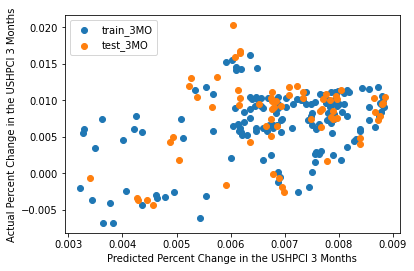

In [ ]:
# To check model performance
plt.scatter(en_3MO.predict(X_train_3MO), y_train_3MO, label='train_3MO')
plt.scatter(en_pred_3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

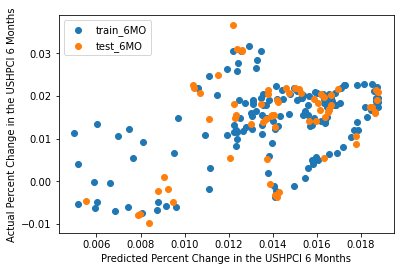

In [ ]:
# To check model performance
plt.scatter(en_6MO.predict(X_train_6MO), y_train_6MO, label='train_6MO')
plt.scatter(en_pred_6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

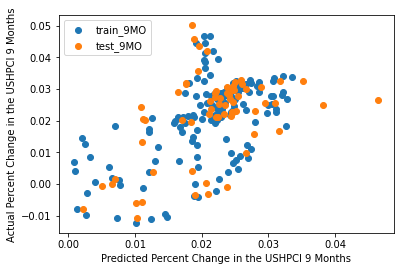

In [ ]:
# To check model performance
plt.scatter(en_9MO.predict(X_train_9MO), y_train_9MO, label='train_9MO')
plt.scatter(en_pred_9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

# SVR

In [ ]:
svr_3MO = SVR(C = 0.05, gamma = 0.1, kernel='rbf').fit(X_train_3MO, y_train_3MO)
svr_pred_3MO = svr_3MO.predict(X_test_3MO)
svr_6MO = SVR(C = 0.05, gamma = 0.1, kernel='rbf').fit(X_train_6MO, y_train_6MO)
svr_pred_6MO = svr_6MO.predict(X_test_6MO)
svr_9MO = SVR(C = 0.05, gamma = 0.1, kernel='rbf').fit(X_train_9MO, y_train_9MO)
svr_pred_9MO = svr_9MO.predict(X_test_9MO)

In [ ]:
svr_train_MSE_3MO = mean_squared_error(y_train_3MO, svr_3MO.predict(X_train_3MO))
svr_test_MSE_3MO = mean_squared_error(y_test_3MO, svr_pred_3MO)
svr_train_r2_3MO = r2_score(y_train_3MO, svr_3MO.predict(X_train_3MO))
svr_test_r2_3MO = r2_score(y_test_3MO, svr_pred_3MO)

svr_train_MSE_6MO = mean_squared_error(y_train_6MO, svr_6MO.predict(X_train_6MO))
svr_test_MSE_6MO = mean_squared_error(y_test_6MO, svr_pred_6MO)
svr_train_r2_6MO = r2_score(y_train_6MO, svr_6MO.predict(X_train_6MO))
svr_test_r2_6MO = r2_score(y_test_6MO, svr_pred_6MO)

svr_train_MSE_9MO = mean_squared_error(y_train_9MO, svr_9MO.predict(X_train_9MO))
svr_test_MSE_9MO = mean_squared_error(y_test_9MO, svr_pred_9MO)
svr_train_r2_9MO = r2_score(y_train_9MO, svr_9MO.predict(X_train_9MO))
svr_test_r2_9MO = r2_score(y_test_9MO, svr_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.6f' % svr_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % svr_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.6f' % svr_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % svr_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.6f' % svr_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % svr_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.6f' % svr_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % svr_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.6f' % svr_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % svr_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.6f' % svr_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % svr_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.000026
Coefficient of determination for 3MO train set: -0.218
Mean Squared Error for 3MO test set: 0.000036
Coefficient of determination for 3MO test set: -0.318
-----------------------------------------
Mean Squared Error for 6MO train set: 0.000078
Coefficient of determination for 6MO train set: -0.044
Mean Squared Error for 6MO test set: 0.000106
Coefficient of determination for 6MO test set: -0.038
-----------------------------------------
Mean Squared Error for 9MO train set: 0.000177
Coefficient of determination for 9MO train set: -0.080
Mean Squared Error for 9MO test set: 0.000199
Coefficient of determination for 9MO test set: -0.097
-----------------------------------------


In [ ]:
# Using grid search cross validation to select the best alpha
parameters_svr = {'gamma': list(np.arange(0.001, 10, 0.05)),
           'C': list(np.arange(0.001, 1, 0.05)),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svr = SVR()
svr_cv_3MO = GridSearchCV(svr, parameters_svr, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_3MO, y_train_3MO)
svr_cv_6MO = GridSearchCV(svr, parameters_svr, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_6MO, y_train_6MO)
svr_cv_9MO = GridSearchCV(svr, parameters_svr, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_9MO, y_train_9MO)

In [ ]:
# Cross val score
train_cv_scores_3MO = cross_val_score(svr_cv_3MO, X_train_3MO, y_train_3MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_3MO = cross_val_score(svr_cv_3MO, X_test_3MO, y_test_3MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_6MO = cross_val_score(svr_cv_6MO, X_train_6MO, y_train_6MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_6MO = cross_val_score(svr_cv_6MO, X_test_6MO, y_test_6MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_9MO = cross_val_score(svr_cv_9MO, X_train_9MO, y_train_9MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_9MO = cross_val_score(svr_cv_9MO, X_test_9MO, y_test_9MO, scoring = 'r2', cv=5, n_jobs=-1)

In [ ]:
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_3MO), np.std(train_cv_scores_3MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_3MO), np.std(test_cv_scores_3MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_6MO), np.std(train_cv_scores_6MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_6MO), np.std(test_cv_scores_6MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_9MO), np.std(train_cv_scores_9MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_9MO), np.std(test_cv_scores_9MO)))

The CV accuracy scores for the train set is: [-0.1972331  -0.36741911 -0.00779705 -0.66399436 -0.35805766]
The mean/standard deviation of CV accuracy score for the train set is: -0.319 +/- 0.217
The CV accuracy scores for the test set is: [-0.04524703 -0.1753297  -0.02047131 -0.04953281 -0.0584735 ]
The mean/standard deviation of CV accuracy score for the test set is: -0.070 +/- 0.054
-----------------------------------------
The CV accuracy scores for the train set is: [-0.01038705 -0.1442359  -0.00037382 -0.14966565 -0.11413734]
The mean/standard deviation of CV accuracy score for the train set is: -0.084 +/- 0.065
The CV accuracy scores for the test set is: [-0.10885364 -0.09429153 -0.05324524 -0.00030023 -0.24333273]
The mean/standard deviation of CV accuracy score for the test set is: -0.100 +/- 0.081
-----------------------------------------
The CV accuracy scores for the train set is: [-4.13488966e-02 -2.34566398e-01 -6.55860000e-05 -1.65130464e-01
 -9.87639774e-02]
The mean/sta

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(svr_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(svr_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(svr_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(svr_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(svr_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(svr_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is -0.3189
The best parameters for 3MO is {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
-----------------------------------------
The best training R-Squared score for 6MO is -0.0838
The best parameters for 6MO is {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
-----------------------------------------
The best training R-Squared score for 9MO is -0.108
The best parameters for 9MO is {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
-----------------------------------------


In [ ]:
svr_3MO = SVR(C = 0.001, gamma = 0.001, kernel='linear').fit(X_train_3MO, y_train_3MO)
svr_pred_3MO = svr_3MO.predict(X_test_3MO)
svr_6MO = SVR(C = 0.001, gamma = 0.001, kernel='linear').fit(X_train_6MO, y_train_6MO)
svr_pred_6MO = svr_6MO.predict(X_test_6MO)
svr_9MO = SVR(C = 0.001, gamma = 0.001, kernel='linear').fit(X_train_9MO, y_train_9MO)
svr_pred_9MO = svr_9MO.predict(X_test_9MO)

In [ ]:
svr_train_MSE_3MO = mean_squared_error(y_train_3MO, svr_3MO.predict(X_train_3MO))
svr_test_MSE_3MO = mean_squared_error(y_test_3MO, svr_pred_3MO)
svr_train_r2_3MO = r2_score(y_train_3MO, svr_3MO.predict(X_train_3MO))
svr_test_r2_3MO = r2_score(y_test_3MO, svr_pred_3MO)

svr_train_MSE_6MO = mean_squared_error(y_train_6MO, svr_6MO.predict(X_train_6MO))
svr_test_MSE_6MO = mean_squared_error(y_test_6MO, svr_pred_6MO)
svr_train_r2_6MO = r2_score(y_train_6MO, svr_6MO.predict(X_train_6MO))
svr_test_r2_6MO = r2_score(y_test_6MO, svr_pred_6MO)

svr_train_MSE_9MO = mean_squared_error(y_train_9MO, svr_9MO.predict(X_train_9MO))
svr_test_MSE_9MO = mean_squared_error(y_test_9MO, svr_pred_9MO)
svr_train_r2_9MO = r2_score(y_train_9MO, svr_9MO.predict(X_train_9MO))
svr_test_r2_9MO = r2_score(y_test_9MO, svr_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % svr_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % svr_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % svr_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % svr_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % svr_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % svr_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % svr_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % svr_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % svr_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % svr_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % svr_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % svr_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0000262029
Coefficient of determination for 3MO train set: -0.218
Mean Squared Error for 3MO test set: 0.0000357198
Coefficient of determination for 3MO test set: -0.318
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0000782652
Coefficient of determination for 6MO train set: -0.044
Mean Squared Error for 6MO test set: 0.0001058687
Coefficient of determination for 6MO test set: -0.038
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0001769231
Coefficient of determination for 9MO train set: -0.080
Mean Squared Error for 9MO test set: 0.0001993278
Coefficient of determination for 9MO test set: -0.097
-----------------------------------------


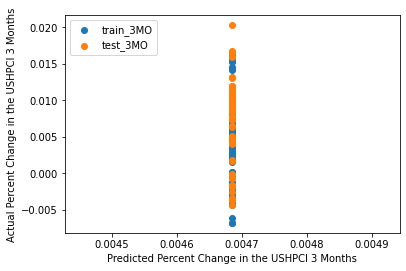

In [ ]:
# To check model performance
plt.scatter(svr_3MO.predict(X_train_3MO), y_train_3MO, label='train_3MO')
plt.scatter(svr_pred_3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

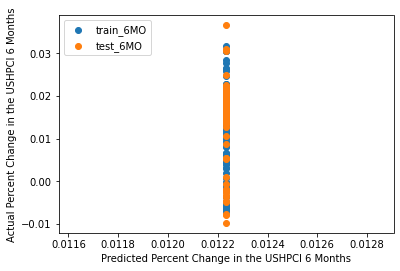

In [ ]:
# To check model performance
plt.scatter(svr_6MO.predict(X_train_6MO), y_train_6MO, label='train_6MO')
plt.scatter(svr_pred_6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

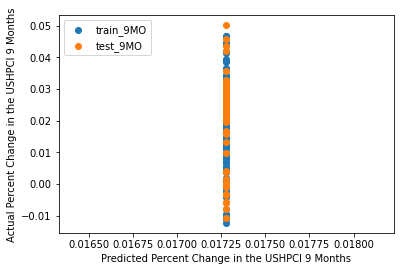

In [ ]:
# To check model performance
plt.scatter(svr_9MO.predict(X_train_9MO), y_train_9MO, label='train_9MO')
plt.scatter(svr_pred_9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

# Decision Tree Regressor

In [ ]:
tree_3MO = DecisionTreeRegressor(max_depth = 3, max_features = 'auto', criterion = 'mse', random_state = 43).fit(X_train_3MO, y_train_3MO)
tree_pred_3MO = tree_3MO.predict(X_test_3MO)
tree_6MO = DecisionTreeRegressor(max_depth = 3, max_features = 'auto', criterion = 'mse', random_state = 43).fit(X_train_6MO, y_train_6MO)
tree_pred_6MO = tree_6MO.predict(X_test_6MO)
tree_9MO = DecisionTreeRegressor(max_depth = 3, max_features = 'auto', criterion = 'mse', random_state = 43).fit(X_train_9MO, y_train_9MO)
tree_pred_9MO = tree_9MO.predict(X_test_9MO)

In [ ]:
tree_train_MSE_3MO = mean_squared_error(y_train_3MO, tree_3MO.predict(X_train_3MO))
tree_test_MSE_3MO = mean_squared_error(y_test_3MO, tree_pred_3MO)
tree_train_r2_3MO = r2_score(y_train_3MO, tree_3MO.predict(X_train_3MO))
tree_test_r2_3MO = r2_score(y_test_3MO, tree_pred_3MO)

tree_train_MSE_6MO = mean_squared_error(y_train_6MO, tree_6MO.predict(X_train_6MO))
tree_test_MSE_6MO = mean_squared_error(y_test_6MO, tree_pred_6MO)
tree_train_r2_6MO = r2_score(y_train_6MO, tree_6MO.predict(X_train_6MO))
tree_test_r2_6MO = r2_score(y_test_6MO, tree_pred_6MO)

tree_train_MSE_9MO = mean_squared_error(y_train_9MO, tree_9MO.predict(X_train_9MO))
tree_test_MSE_9MO = mean_squared_error(y_test_9MO, tree_pred_9MO)
tree_train_r2_9MO = r2_score(y_train_9MO, tree_9MO.predict(X_train_9MO))
tree_test_r2_9MO = r2_score(y_test_9MO, tree_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.6f' % tree_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % tree_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.6f' % tree_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % tree_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.6f' % tree_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % tree_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.6f' % tree_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % tree_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.6f' % tree_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % tree_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.6f' % tree_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % tree_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.000010
Coefficient of determination for 3MO train set: 0.531
Mean Squared Error for 3MO test set: 0.000021
Coefficient of determination for 3MO test set: 0.232
-----------------------------------------
Mean Squared Error for 6MO train set: 0.000035
Coefficient of determination for 6MO train set: 0.537
Mean Squared Error for 6MO test set: 0.000076
Coefficient of determination for 6MO test set: 0.259
-----------------------------------------
Mean Squared Error for 9MO train set: 0.000054
Coefficient of determination for 9MO train set: 0.670
Mean Squared Error for 9MO test set: 0.000096
Coefficient of determination for 9MO test set: 0.471
-----------------------------------------


In [ ]:
# Using grid search cross validation to select the best max_depth and max_features
parameters_tree = {'max_depth': np.arange(1, 24, 2),
                   'criterion': ['squared_error', 'mse', 'friedman_mse', 'absolute_error', 'mae', 'poisson'],
              'max_features': ["auto", "sqrt", "log2"]}
tree = DecisionTreeRegressor(random_state = 43)

tree_cv_3MO = GridSearchCV(tree, parameters_tree, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_3MO, y_train_3MO)
tree_cv_6MO = GridSearchCV(tree, parameters_tree, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_6MO, y_train_6MO)
tree_cv_9MO = GridSearchCV(tree, parameters_tree, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_9MO, y_train_9MO)

In [ ]:
# Cross val score
train_cv_scores_3MO = cross_val_score(tree_cv_3MO, X_train_3MO, y_train_3MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_3MO = cross_val_score(tree_cv_3MO, X_test_3MO, y_test_3MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_6MO = cross_val_score(tree_cv_6MO, X_train_6MO, y_train_6MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_6MO = cross_val_score(tree_cv_6MO, X_test_6MO, y_test_6MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_9MO = cross_val_score(tree_cv_9MO, X_train_9MO, y_train_9MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_9MO = cross_val_score(tree_cv_9MO, X_test_9MO, y_test_9MO, scoring = 'r2', cv=5, n_jobs=-1)

In [ ]:
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_3MO), np.std(train_cv_scores_3MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_3MO), np.std(test_cv_scores_3MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_6MO), np.std(train_cv_scores_6MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_6MO), np.std(test_cv_scores_6MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_9MO), np.std(train_cv_scores_9MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_9MO), np.std(test_cv_scores_9MO)))

The CV accuracy scores for the train set is: [ 0.27237263 -0.0605645   0.29561698  0.19771013  0.24680298]
The mean/standard deviation of CV accuracy score for the train set is: 0.190 +/- 0.130
The CV accuracy scores for the test set is: [-0.06505804  0.47110555  0.50657493  0.44695255  0.20462855]
The mean/standard deviation of CV accuracy score for the test set is: 0.313 +/- 0.217
-----------------------------------------
The CV accuracy scores for the train set is: [ 0.29392641 -0.03495878  0.30905691  0.42404338  0.3255408 ]
The mean/standard deviation of CV accuracy score for the train set is: 0.264 +/- 0.156
The CV accuracy scores for the test set is: [0.44973273 0.73190638 0.65073819 0.51546008 0.32650366]
The mean/standard deviation of CV accuracy score for the test set is: 0.535 +/- 0.144
-----------------------------------------
The CV accuracy scores for the train set is: [0.3258575  0.15283541 0.08980682 0.47867181 0.48229917]
The mean/standard deviation of CV accuracy scor

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(tree_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(tree_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(tree_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(tree_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(tree_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(tree_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is 0.1904
The best parameters for 3MO is {'criterion': 'mse', 'max_depth': 1, 'max_features': 'sqrt'}
-----------------------------------------
The best training R-Squared score for 6MO is 0.2635
The best parameters for 6MO is {'criterion': 'mse', 'max_depth': 1, 'max_features': 'sqrt'}
-----------------------------------------
The best training R-Squared score for 9MO is 0.3845
The best parameters for 9MO is {'criterion': 'friedman_mse', 'max_depth': 17, 'max_features': 'auto'}
-----------------------------------------


In [ ]:
tree_3MO = DecisionTreeRegressor(max_depth = 1, max_features = 'sqrt', criterion ='mse', random_state = 43).fit(X_train_3MO, y_train_3MO)
tree_pred_3MO = tree_3MO.predict(X_test_3MO)
tree_6MO = DecisionTreeRegressor(max_depth = 1, max_features = 'sqrt', criterion = 'mse', random_state = 43).fit(X_train_6MO, y_train_6MO)
tree_pred_6MO = tree_6MO.predict(X_test_6MO)
tree_9MO = DecisionTreeRegressor(max_depth = 17, max_features = 'auto', criterion = 'friedman_mse', random_state = 43).fit(X_train_9MO, y_train_9MO)
tree_pred_9MO = tree_9MO.predict(X_test_9MO)

In [ ]:
tree_train_MSE_3MO = mean_squared_error(y_train_3MO, tree_3MO.predict(X_train_3MO))
tree_test_MSE_3MO = mean_squared_error(y_test_3MO, tree_pred_3MO)
tree_train_r2_3MO = r2_score(y_train_3MO, tree_3MO.predict(X_train_3MO))
tree_test_r2_3MO = r2_score(y_test_3MO, tree_pred_3MO)

tree_train_MSE_6MO = mean_squared_error(y_train_6MO, tree_6MO.predict(X_train_6MO))
tree_test_MSE_6MO = mean_squared_error(y_test_6MO, tree_pred_6MO)
tree_train_r2_6MO = r2_score(y_train_6MO, tree_6MO.predict(X_train_6MO))
tree_test_r2_6MO = r2_score(y_test_6MO, tree_pred_6MO)

tree_train_MSE_9MO = mean_squared_error(y_train_9MO, tree_9MO.predict(X_train_9MO))
tree_test_MSE_9MO = mean_squared_error(y_test_9MO, tree_pred_9MO)
tree_train_r2_9MO = r2_score(y_train_9MO, tree_9MO.predict(X_train_9MO))
tree_test_r2_9MO = r2_score(y_test_9MO, tree_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % tree_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % tree_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % tree_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % tree_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % tree_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % tree_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % tree_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % tree_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % tree_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % tree_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % tree_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % tree_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0000155419
Coefficient of determination for 3MO train set: 0.277
Mean Squared Error for 3MO test set: 0.0000240982
Coefficient of determination for 3MO test set: 0.111
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0000494449
Coefficient of determination for 6MO train set: 0.341
Mean Squared Error for 6MO test set: 0.0000579666
Coefficient of determination for 6MO test set: 0.432
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0000707840
Coefficient of determination for 9MO train set: 0.568
Mean Squared Error for 9MO test set: 0.0000834797
Coefficient of determination for 9MO test set: 0.540
-----------------------------------------


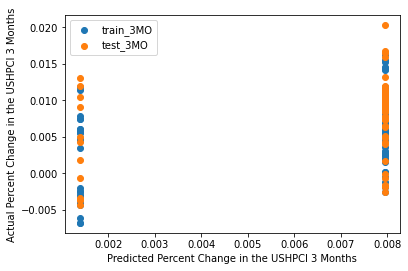

In [ ]:
# To check model performance
plt.scatter(tree_3MO.predict(X_train_3MO), y_train_3MO, label='train_3MO')
plt.scatter(tree_pred_3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

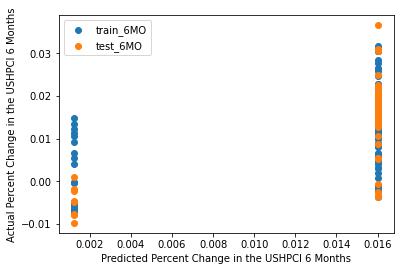

In [ ]:
plt.scatter(tree_6MO.predict(X_train_6MO), y_train_6MO, label='train_6MO')
plt.scatter(tree_pred_6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.legend()
plt.show()

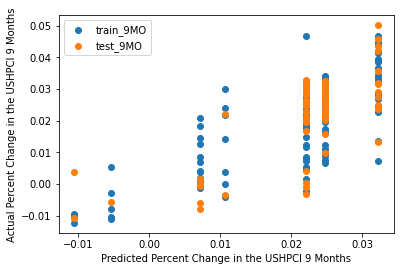

In [ ]:
plt.scatter(tree_9MO.predict(X_train_9MO), y_train_9MO, label='train_9MO')
plt.scatter(tree_pred_9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.legend()
plt.show()

# Random Forest Regressor

In [ ]:
rf_3MO = RandomForestRegressor(n_estimators=500, max_depth = 3, max_features = 'auto', min_samples_split=5, random_state = 43).fit(X_train_3MO, y_train_3MO)
rf_pred_3MO = rf_3MO.predict(X_test_3MO)
rf_6MO = RandomForestRegressor(n_estimators=500, max_depth = 3, max_features = 'auto', min_samples_split=5, random_state = 43).fit(X_train_6MO, y_train_6MO)
rf_pred_6MO = rf_6MO.predict(X_test_6MO)
rf_9MO = RandomForestRegressor(n_estimators=500, max_depth = 3, max_features = 'auto', min_samples_split=5, random_state = 43).fit(X_train_9MO, y_train_9MO)
rf_pred_9MO = rf_9MO.predict(X_test_9MO)

NameError: ignored

In [ ]:
rf_train_MSE_3MO = mean_squared_error(y_train_3MO, rf_3MO.predict(X_train_3MO))
rf_test_MSE_3MO = mean_squared_error(y_test_3MO, rf_pred_3MO)
rf_train_r2_3MO = r2_score(y_train_3MO, rf_3MO.predict(X_train_3MO))
rf_test_r2_3MO = r2_score(y_test_3MO, rf_pred_3MO)

rf_train_MSE_6MO = mean_squared_error(y_train_6MO, rf_6MO.predict(X_train_6MO))
rf_test_MSE_6MO = mean_squared_error(y_test_6MO, rf_pred_6MO)
rf_train_r2_6MO = r2_score(y_train_6MO, rf_6MO.predict(X_train_6MO))
rf_test_r2_6MO = r2_score(y_test_6MO, rf_pred_6MO)

rf_train_MSE_9MO = mean_squared_error(y_train_9MO, rf_9MO.predict(X_train_9MO))
rf_test_MSE_9MO = mean_squared_error(y_test_9MO, rf_pred_9MO)
rf_train_r2_9MO = r2_score(y_train_9MO, rf_9MO.predict(X_train_9MO))
rf_test_r2_9MO = r2_score(y_test_9MO, rf_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.6f' % rf_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % rf_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.6f' % rf_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % rf_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.6f' % rf_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % rf_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.6f' % rf_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % rf_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.6f' % rf_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % rf_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.6f' % rf_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % rf_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.000009
Coefficient of determination for 3MO train set: 0.560
Mean Squared Error for 3MO test set: 0.000019
Coefficient of determination for 3MO test set: 0.313
-----------------------------------------
Mean Squared Error for 6MO train set: 0.000028
Coefficient of determination for 6MO train set: 0.623
Mean Squared Error for 6MO test set: 0.000056
Coefficient of determination for 6MO test set: 0.447
-----------------------------------------
Mean Squared Error for 9MO train set: 0.000050
Coefficient of determination for 9MO train set: 0.697
Mean Squared Error for 9MO test set: 0.000085
Coefficient of determination for 9MO test set: 0.530
-----------------------------------------


In [ ]:
# Using grid search cross validation to select the best parameters
parameters_rf = {'n_estimators': np.arange(500, 4000, 500),
            'max_depth': np.arange(1, 10, 2),
            'min_samples_split': np.arange(2, 20, 3),
            'max_features': ["auto", "sqrt", "log2"]}
rf = RandomForestRegressor(random_state = 43)

rf_cv_3MO = GridSearchCV(rf, parameters_rf, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_3MO, y_train_3MO)
rf_cv_6MO = GridSearchCV(rf, parameters_rf, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_6MO, y_train_6MO)
rf_cv_9MO = GridSearchCV(rf, parameters_rf, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_9MO, y_train_9MO)

In [ ]:
# Cross val score
train_cv_scores_3MO = cross_val_score(rf_cv_3MO, X_train_3MO, y_train_3MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_3MO = cross_val_score(rf_cv_3MO, X_test_3MO, y_test_3MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_6MO = cross_val_score(rf_cv_6MO, X_train_6MO, y_train_6MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_6MO = cross_val_score(rf_cv_6MO, X_test_6MO, y_test_6MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_9MO = cross_val_score(rf_cv_9MO, X_train_9MO, y_train_9MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_9MO = cross_val_score(rf_cv_9MO, X_test_9MO, y_test_9MO, scoring = 'r2', cv=5, n_jobs=-1)

In [ ]:
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_3MO), np.std(train_cv_scores_3MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_3MO), np.std(test_cv_scores_3MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_6MO), np.std(train_cv_scores_6MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_6MO), np.std(test_cv_scores_6MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_9MO), np.std(train_cv_scores_9MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_9MO), np.std(test_cv_scores_9MO)))

The CV accuracy scores for the train set is: [ 0.1136731  -0.12604315  0.36839995  0.2502559   0.26153502]
The mean/standard deviation of CV accuracy score for the train set is: 0.174 +/- 0.170
The CV accuracy scores for the test set is: [0.12487891 0.54147146 0.37979999 0.30676994 0.18165279]
The mean/standard deviation of CV accuracy score for the test set is: 0.307 +/- 0.148
-----------------------------------------
The CV accuracy scores for the train set is: [ 0.3582574  -0.10731388  0.49883587  0.59980152  0.49911926]
The mean/standard deviation of CV accuracy score for the train set is: 0.370 +/- 0.251
The CV accuracy scores for the test set is: [0.49628953 0.72619554 0.60046244 0.21481721 0.47105798]
The mean/standard deviation of CV accuracy score for the test set is: 0.502 +/- 0.169
-----------------------------------------
The CV accuracy scores for the train set is: [0.69446524 0.27068251 0.49424882 0.66810802 0.56908313]
The mean/standard deviation of CV accuracy score for

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(rf_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(rf_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(rf_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(rf_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(rf_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(rf_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is 0.233
The best parameters for 3MO is {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 11, 'n_estimators': 150}
-----------------------------------------
The best training R-Squared score for 6MO is 0.4194
The best parameters for 6MO is {'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
-----------------------------------------
The best training R-Squared score for 9MO is 0.5552
The best parameters for 9MO is {'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 150}
-----------------------------------------


In [ ]:
rf_3MO = RandomForestRegressor(n_estimators=150, max_depth = 7, max_features = 'sqrt', min_samples_split=11, random_state = 43).fit(X_train_3MO, y_train_3MO)
rf_pred_3MO = rf_3MO.predict(X_test_3MO)
rf_6MO = RandomForestRegressor(n_estimators=100, max_depth = 7, max_features = 'auto', min_samples_split=5, random_state = 43).fit(X_train_6MO, y_train_6MO)
rf_pred_6MO = rf_6MO.predict(X_test_6MO)
rf_9MO = RandomForestRegressor(n_estimators=150, max_depth = 9, max_features = 'auto', min_samples_split=2, random_state = 43).fit(X_train_9MO, y_train_9MO)
rf_pred_9MO = rf_9MO.predict(X_test_9MO)

In [ ]:
rf_train_MSE_3MO = mean_squared_error(y_train_3MO, rf_3MO.predict(X_train_3MO))
rf_test_MSE_3MO = mean_squared_error(y_test_3MO, rf_pred_3MO)
rf_train_r2_3MO = r2_score(y_train_3MO, rf_3MO.predict(X_train_3MO))
rf_test_r2_3MO = r2_score(y_test_3MO, rf_pred_3MO)

rf_train_MSE_6MO = mean_squared_error(y_train_6MO, rf_6MO.predict(X_train_6MO))
rf_test_MSE_6MO = mean_squared_error(y_test_6MO, rf_pred_6MO)
rf_train_r2_6MO = r2_score(y_train_6MO, rf_6MO.predict(X_train_6MO))
rf_test_r2_6MO = r2_score(y_test_6MO, rf_pred_6MO)

rf_train_MSE_9MO = mean_squared_error(y_train_9MO, rf_9MO.predict(X_train_9MO))
rf_test_MSE_9MO = mean_squared_error(y_test_9MO, rf_pred_9MO)
rf_train_r2_9MO = r2_score(y_train_9MO, rf_9MO.predict(X_train_9MO))
rf_test_r2_9MO = r2_score(y_test_9MO, rf_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % rf_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % rf_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % rf_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % rf_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % rf_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % rf_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % rf_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % rf_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % rf_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % rf_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % rf_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % rf_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0000070222
Coefficient of determination for 3MO train set: 0.673
Mean Squared Error for 3MO test set: 0.0000150047
Coefficient of determination for 3MO test set: 0.447
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0000104706
Coefficient of determination for 6MO train set: 0.860
Mean Squared Error for 6MO test set: 0.0000467655
Coefficient of determination for 6MO test set: 0.542
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0000097201
Coefficient of determination for 9MO train set: 0.941
Mean Squared Error for 9MO test set: 0.0000650652
Coefficient of determination for 9MO test set: 0.642
-----------------------------------------


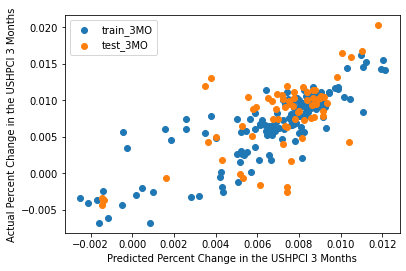

In [ ]:
# To check model performance
plt.scatter(rf_3MO.predict(X_train_3MO), y_train_3MO, label='train_3MO')
plt.scatter(rf_pred_3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

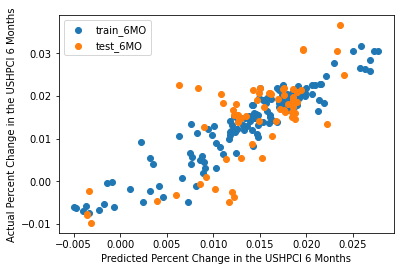

In [ ]:
plt.scatter(rf_6MO.predict(X_train_6MO), y_train_6MO, label='train_6MO')
plt.scatter(rf_pred_6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.legend()
plt.show()

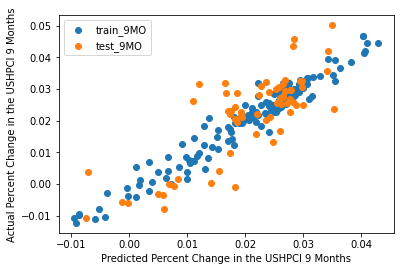

In [ ]:
plt.scatter(rf_9MO.predict(X_train_9MO), y_train_9MO, label='train_9MO')
plt.scatter(rf_pred_9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.legend()
plt.show()

# AdaBoost Regressor

In [ ]:
tree = DecisionTreeRegressor(max_depth = 3, max_features = 'sqrt', criterion = 'mse', random_state = 43)
ada_3MO = AdaBoostRegressor(tree, n_estimators= 100, loss='linear', random_state = 43).fit(X_train_3MO, y_train_3MO)
ada_pred_3MO = ada_3MO.predict(X_test_3MO)
ada_6MO = AdaBoostRegressor(tree, n_estimators= 100, loss='linear', random_state = 43).fit(X_train_6MO, y_train_6MO)
ada_pred_6MO = ada_6MO.predict(X_test_6MO)
ada_9MO = AdaBoostRegressor(tree, n_estimators= 100, loss='linear', random_state = 43).fit(X_train_9MO, y_train_9MO)
ada_pred_9MO = ada_9MO.predict(X_test_9MO)

In [ ]:
ada_train_MSE_3MO = mean_squared_error(y_train_3MO, ada_3MO.predict(X_train_3MO))
ada_test_MSE_3MO = mean_squared_error(y_test_3MO, ada_pred_3MO)
ada_train_r2_3MO = r2_score(y_train_3MO, ada_3MO.predict(X_train_3MO))
ada_test_r2_3MO = r2_score(y_test_3MO, ada_pred_3MO)

ada_train_MSE_6MO = mean_squared_error(y_train_6MO, ada_6MO.predict(X_train_6MO))
ada_test_MSE_6MO = mean_squared_error(y_test_6MO, ada_pred_6MO)
ada_train_r2_6MO = r2_score(y_train_6MO, ada_6MO.predict(X_train_6MO))
ada_test_r2_6MO = r2_score(y_test_6MO, ada_pred_6MO)

ada_train_MSE_9MO = mean_squared_error(y_train_9MO, ada_9MO.predict(X_train_9MO))
ada_test_MSE_9MO = mean_squared_error(y_test_9MO, ada_pred_9MO)
ada_train_r2_9MO = r2_score(y_train_9MO, ada_9MO.predict(X_train_9MO))
ada_test_r2_9MO = r2_score(y_test_9MO, ada_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.6f' % ada_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % ada_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.6f' % ada_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % ada_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.6f' % ada_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % ada_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.6f' % ada_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % ada_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.6f' % ada_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % ada_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.6f' % ada_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % ada_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.000009
Coefficient of determination for 3MO train set: 0.564
Mean Squared Error for 3MO test set: 0.000018
Coefficient of determination for 3MO test set: 0.329
-----------------------------------------
Mean Squared Error for 6MO train set: 0.000027
Coefficient of determination for 6MO train set: 0.643
Mean Squared Error for 6MO test set: 0.000051
Coefficient of determination for 6MO test set: 0.501
-----------------------------------------
Mean Squared Error for 9MO train set: 0.000048
Coefficient of determination for 9MO train set: 0.710
Mean Squared Error for 9MO test set: 0.000077
Coefficient of determination for 9MO test set: 0.576
-----------------------------------------


In [ ]:
# Using grid search cross validation to select the best parameters

tree = DecisionTreeRegressor(max_depth = 3, max_features = 'sqrt', criterion = 'mse', random_state = 43)

parameters_ada = {'n_estimators': np.arange(1, 14, 2), 
                  'loss': ['linear', '‘square', '‘exponential']}
ada = AdaBoostRegressor(tree, random_state = 43)

ada_cv_3MO = GridSearchCV(ada, parameters_ada, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_3MO, y_train_3MO)
ada_cv_6MO = GridSearchCV(ada, parameters_ada, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_6MO, y_train_6MO)
ada_cv_9MO = GridSearchCV(ada, parameters_ada, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_9MO, y_train_9MO)

In [ ]:
# Cross val score
train_cv_scores_3MO = cross_val_score(ada_cv_3MO, X_train_3MO, y_train_3MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_3MO = cross_val_score(ada_cv_3MO, X_test_3MO, y_test_3MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_6MO = cross_val_score(ada_cv_6MO, X_train_6MO, y_train_6MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_6MO = cross_val_score(ada_cv_6MO, X_test_6MO, y_test_6MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_9MO = cross_val_score(ada_cv_9MO, X_train_9MO, y_train_9MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_9MO = cross_val_score(ada_cv_9MO, X_test_9MO, y_test_9MO, scoring = 'r2', cv=5, n_jobs=-1)

In [ ]:
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_3MO), np.std(train_cv_scores_3MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_3MO), np.std(test_cv_scores_3MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_6MO), np.std(train_cv_scores_6MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_6MO), np.std(test_cv_scores_6MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_9MO), np.std(train_cv_scores_9MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_9MO), np.std(test_cv_scores_9MO)))

The CV accuracy scores for the train set is: [-0.23730034 -0.09010994  0.28316671  0.01895106  0.18624079]
The mean/standard deviation of CV accuracy score for the train set is: 0.032 +/- 0.187
The CV accuracy scores for the test set is: [ 0.2048385   0.35798418  0.635533   -0.63062859 -0.1197936 ]
The mean/standard deviation of CV accuracy score for the test set is: 0.090 +/- 0.435
-----------------------------------------
The CV accuracy scores for the train set is: [ 0.31089936 -0.18172327  0.27992508  0.36708754  0.30335937]
The mean/standard deviation of CV accuracy score for the train set is: 0.216 +/- 0.201
The CV accuracy scores for the test set is: [0.51702579 0.61688312 0.45739199 0.4919683  0.13836783]
The mean/standard deviation of CV accuracy score for the test set is: 0.444 +/- 0.162
-----------------------------------------
The CV accuracy scores for the train set is: [0.51946596 0.17009659 0.29901949 0.60124337 0.52369702]
The mean/standard deviation of CV accuracy scor

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(ada_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(ada_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(ada_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(ada_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(ada_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(ada_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is 0.1621
The best parameters for 3MO is {'loss': 'linear', 'n_estimators': 13}
-----------------------------------------
The best training R-Squared score for 6MO is 0.2765
The best parameters for 6MO is {'loss': 'linear', 'n_estimators': 13}
-----------------------------------------
The best training R-Squared score for 9MO is 0.4456
The best parameters for 9MO is {'loss': 'linear', 'n_estimators': 13}
-----------------------------------------


In [ ]:
ada_3MO = AdaBoostRegressor(tree, n_estimators= 13, loss='linear', random_state = 43).fit(X_train_3MO, y_train_3MO)
ada_pred_3MO = ada_3MO.predict(X_test_3MO)
ada_6MO = AdaBoostRegressor(tree, n_estimators= 13, loss='linear', random_state = 43).fit(X_train_6MO, y_train_6MO)
ada_pred_6MO = ada_6MO.predict(X_test_6MO)
ada_9MO = AdaBoostRegressor(tree, n_estimators= 13, loss='linear', random_state = 43).fit(X_train_9MO, y_train_9MO)
ada_pred_9MO = ada_9MO.predict(X_test_9MO)

In [ ]:
ada_train_MSE_3MO = mean_squared_error(y_train_3MO, ada_3MO.predict(X_train_3MO))
ada_test_MSE_3MO = mean_squared_error(y_test_3MO, ada_pred_3MO)
ada_train_r2_3MO = r2_score(y_train_3MO, ada_3MO.predict(X_train_3MO))
ada_test_r2_3MO = r2_score(y_test_3MO, ada_pred_3MO)

ada_train_MSE_6MO = mean_squared_error(y_train_6MO, ada_6MO.predict(X_train_6MO))
ada_test_MSE_6MO = mean_squared_error(y_test_6MO, ada_pred_6MO)
ada_train_r2_6MO = r2_score(y_train_6MO, ada_6MO.predict(X_train_6MO))
ada_test_r2_6MO = r2_score(y_test_6MO, ada_pred_6MO)

ada_train_MSE_9MO = mean_squared_error(y_train_9MO, ada_9MO.predict(X_train_9MO))
ada_test_MSE_9MO = mean_squared_error(y_test_9MO, ada_pred_9MO)
ada_train_r2_9MO = r2_score(y_train_9MO, ada_9MO.predict(X_train_9MO))
ada_test_r2_9MO = r2_score(y_test_9MO, ada_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % ada_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % ada_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % ada_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % ada_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % ada_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % ada_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % ada_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % ada_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % ada_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % ada_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % ada_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % ada_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0000001301
Coefficient of determination for 3MO train set: 0.994
Mean Squared Error for 3MO test set: 0.0000143411
Coefficient of determination for 3MO test set: 0.471
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0000004120
Coefficient of determination for 6MO train set: 0.995
Mean Squared Error for 6MO test set: 0.0000491592
Coefficient of determination for 6MO test set: 0.518
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0000007933
Coefficient of determination for 9MO train set: 0.995
Mean Squared Error for 9MO test set: 0.0000625784
Coefficient of determination for 9MO test set: 0.655
-----------------------------------------


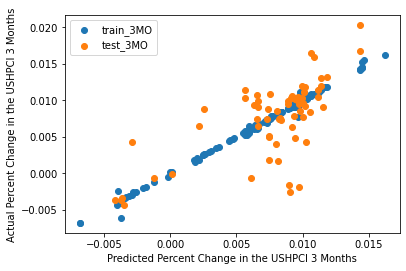

In [ ]:
# To check model performance
plt.scatter(ada_3MO.predict(X_train_3MO), y_train_3MO, label='train_3MO')
plt.scatter(ada_pred_3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

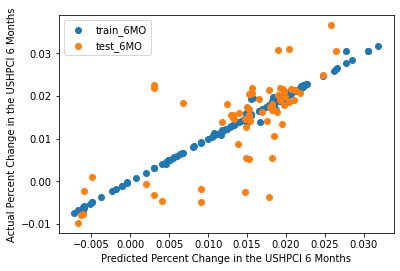

In [ ]:
# To check model performance
plt.scatter(ada_6MO.predict(X_train_6MO), y_train_6MO, label='train_6MO')
plt.scatter(ada_pred_6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

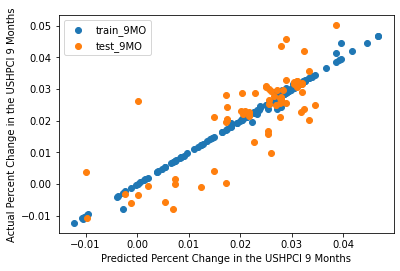

In [ ]:
# To check model performance
plt.scatter(ada_9MO.predict(X_train_9MO), y_train_9MO, label='train_9MO')
plt.scatter(ada_pred_9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

# Multilayer Perceptron Regressor

In [ ]:
mlpr_3MO = MLPRegressor(max_iter=1000, hidden_layer_sizes=3, learning_rate = 'constant', activation= 'relu', random_state = 43).fit(X_train_3MO, y_train_3MO)
mlpr_pred_3MO = mlpr_3MO.predict(X_test_3MO)
mlpr_6MO = MLPRegressor(max_iter=1000, hidden_layer_sizes=3, learning_rate = 'constant', activation= 'relu', random_state = 43).fit(X_train_6MO, y_train_6MO)
mlpr_pred_6MO = mlpr_6MO.predict(X_test_6MO)
mlpr_9MO = MLPRegressor(max_iter=1000, hidden_layer_sizes=3, learning_rate = 'constant', activation= 'relu', random_state = 43).fit(X_train_9MO, y_train_9MO)
mlpr_pred_9MO = mlpr_9MO.predict(X_test_9MO)

In [ ]:
mlpr_train_MSE_3MO = mean_squared_error(y_train_3MO, mlpr_3MO.predict(X_train_3MO))
mlpr_test_MSE_3MO = mean_squared_error(y_test_3MO, mlpr_pred_3MO)
mlpr_train_r2_3MO = r2_score(y_train_3MO, mlpr_3MO.predict(X_train_3MO))
mlpr_test_r2_3MO = r2_score(y_test_3MO, mlpr_pred_3MO)

mlpr_train_MSE_6MO = mean_squared_error(y_train_6MO, mlpr_6MO.predict(X_train_6MO))
mlpr_test_MSE_6MO = mean_squared_error(y_test_6MO, mlpr_pred_6MO)
mlpr_train_r2_6MO = r2_score(y_train_6MO, mlpr_6MO.predict(X_train_6MO))
mlpr_test_r2_6MO = r2_score(y_test_6MO, mlpr_pred_6MO)

mlpr_train_MSE_9MO = mean_squared_error(y_train_9MO, mlpr_9MO.predict(X_train_9MO))
mlpr_test_MSE_9MO = mean_squared_error(y_test_9MO, mlpr_pred_9MO)
mlpr_train_r2_9MO = r2_score(y_train_9MO, mlpr_9MO.predict(X_train_9MO))
mlpr_test_r2_9MO = r2_score(y_test_9MO, mlpr_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.6f' % mlpr_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % mlpr_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.6f' % mlpr_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % mlpr_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.6f' % mlpr_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % mlpr_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.6f' % mlpr_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % mlpr_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.6f' % mlpr_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % mlpr_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.6f' % mlpr_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % mlpr_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.041050
Coefficient of determination for 3MO train set: -1907.900
Mean Squared Error for 3MO test set: 0.038040
Coefficient of determination for 3MO test set: -1402.149
-----------------------------------------
Mean Squared Error for 6MO train set: 0.040994
Coefficient of determination for 6MO train set: -545.681
Mean Squared Error for 6MO test set: 0.037830
Coefficient of determination for 6MO test set: -369.835
-----------------------------------------
Mean Squared Error for 9MO train set: 0.040990
Coefficient of determination for 9MO train set: -249.282
Mean Squared Error for 9MO test set: 0.037667
Coefficient of determination for 9MO test set: -206.385
-----------------------------------------


In [ ]:
# Using grid search cross validation to select the best parameters
parameters_mlpr = {'max_iter': np.arange(10, 1000, 10),
                   'hidden_layer_sizes': np.arange(1, 100, 10)}
mlpr = MLPRegressor(random_state = 43)

mlpr_cv_3MO = GridSearchCV(mlpr, parameters_mlpr, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_3MO, y_train_3MO)
mlpr_cv_6MO = GridSearchCV(mlpr, parameters_mlpr, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_6MO, y_train_6MO)
mlpr_cv_9MO = GridSearchCV(mlpr, parameters_mlpr, scoring = 'r2', cv = 5, n_jobs = -1).fit(X_train_9MO, y_train_9MO)

In [ ]:
# Cross val score
train_cv_scores_3MO = cross_val_score(mlpr_cv_3MO, X_train_3MO, y_train_3MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_3MO = cross_val_score(mlpr_cv_3MO, X_test_3MO, y_test_3MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_6MO = cross_val_score(mlpr_cv_6MO, X_train_6MO, y_train_6MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_6MO = cross_val_score(mlpr_cv_6MO, X_test_6MO, y_test_6MO, scoring = 'r2', cv=5, n_jobs=-1)
train_cv_scores_9MO = cross_val_score(mlpr_cv_9MO, X_train_9MO, y_train_9MO, scoring = 'r2', cv=5, n_jobs=-1)
test_cv_scores_9MO = cross_val_score(mlpr_cv_9MO, X_test_9MO, y_test_9MO, scoring = 'r2', cv=5, n_jobs=-1)

In [ ]:
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_3MO), np.std(train_cv_scores_3MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_3MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_3MO), np.std(test_cv_scores_3MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_6MO), np.std(train_cv_scores_6MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_6MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_6MO), np.std(test_cv_scores_6MO)))
print("-----------------------------------------")
print('The CV accuracy scores for the train set is: %s' % np.round(train_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the train set is: %.3f +/- %.3f' % (np.mean(train_cv_scores_9MO), np.std(train_cv_scores_9MO)))
print('The CV accuracy scores for the test set is: %s' % np.round(test_cv_scores_9MO, 10))
print('The mean/standard deviation of CV accuracy score for the test set is: %.3f +/- %.3f' % (np.mean(test_cv_scores_9MO), np.std(test_cv_scores_9MO)))

The CV accuracy scores for the train set is: [-177.52218466 -200.48597746  -71.47822583 -535.03648624  -85.25454095]
The mean/standard deviation of CV accuracy score for the train set is: -213.955 +/- 168.206
The CV accuracy scores for the test set is: [-348.00853387 -245.54020859 -162.51062549 -190.92661342 -129.24857048]
The mean/standard deviation of CV accuracy score for the test set is: -215.247 +/- 76.566
-----------------------------------------
The CV accuracy scores for the train set is: [ -46.66687858  -66.59793462  -28.60855217 -129.98387592  -21.14383385]
The mean/standard deviation of CV accuracy score for the train set is: -58.600 +/- 38.999
The CV accuracy scores for the test set is: [-15.19948948 -58.47880967 -41.34922168 -37.44445031 -40.80536071]
The mean/standard deviation of CV accuracy score for the test set is: -38.655 +/- 13.831
-----------------------------------------
The CV accuracy scores for the train set is: [-22.73294054 -31.34169504 -16.6479954  -18.11711

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(mlpr_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(mlpr_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(mlpr_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(mlpr_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(mlpr_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(mlpr_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is -137.4755
The best parameters for 3MO is {'hidden_layer_sizes': 91, 'max_iter': 70}
-----------------------------------------
The best training R-Squared score for 6MO is -38.8831
The best parameters for 6MO is {'hidden_layer_sizes': 91, 'max_iter': 70}
-----------------------------------------
The best training R-Squared score for 9MO is -17.7489
The best parameters for 9MO is {'hidden_layer_sizes': 71, 'max_iter': 40}
-----------------------------------------


In [ ]:
mlpr_3MO = MLPRegressor(max_iter=70, hidden_layer_sizes = 91, random_state = 43).fit(X_train_3MO, y_train_3MO)
mlpr_pred_3MO = mlpr_3MO.predict(X_test_3MO)
mlpr_6MO = MLPRegressor(max_iter=70, hidden_layer_sizes = 91, random_state = 43).fit(X_train_6MO, y_train_6MO)
mlpr_pred_6MO = mlpr_6MO.predict(X_test_6MO)
mlpr_9MO = MLPRegressor(max_iter=40, hidden_layer_sizes = 71, random_state = 43).fit(X_train_9MO, y_train_9MO)
mlpr_pred_9MO = mlpr_9MO.predict(X_test_9MO)

In [ ]:
mlpr_train_MSE_3MO = mean_squared_error(y_train_3MO, mlpr_3MO.predict(X_train_3MO))
mlpr_test_MSE_3MO = mean_squared_error(y_test_3MO, mlpr_pred_3MO)
mlpr_train_r2_3MO = r2_score(y_train_3MO, mlpr_3MO.predict(X_train_3MO))
mlpr_test_r2_3MO = r2_score(y_test_3MO, mlpr_pred_3MO)

mlpr_train_MSE_6MO = mean_squared_error(y_train_6MO, mlpr_6MO.predict(X_train_6MO))
mlpr_test_MSE_6MO = mean_squared_error(y_test_6MO, mlpr_pred_6MO)
mlpr_train_r2_6MO = r2_score(y_train_6MO, mlpr_6MO.predict(X_train_6MO))
mlpr_test_r2_6MO = r2_score(y_test_6MO, mlpr_pred_6MO)

mlpr_train_MSE_9MO = mean_squared_error(y_train_9MO, mlpr_9MO.predict(X_train_9MO))
mlpr_test_MSE_9MO = mean_squared_error(y_test_9MO, mlpr_pred_9MO)
mlpr_train_r2_9MO = r2_score(y_train_9MO, mlpr_9MO.predict(X_train_9MO))
mlpr_test_r2_9MO = r2_score(y_test_9MO, mlpr_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % mlpr_train_MSE_3MO)
print('Coefficient of determination for 3MO train set: %.3f' % mlpr_train_r2_3MO)
print('Mean Squared Error for 3MO test set: %.10f' % mlpr_test_MSE_3MO)
print('Coefficient of determination for 3MO test set: %.3f' % mlpr_test_r2_3MO)
print("-----------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % mlpr_train_MSE_6MO)
print('Coefficient of determination for 6MO train set: %.3f' % mlpr_train_r2_6MO)
print('Mean Squared Error for 6MO test set: %.10f' % mlpr_test_MSE_6MO)
print('Coefficient of determination for 6MO test set: %.3f' % mlpr_test_r2_6MO)
print("-----------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % mlpr_train_MSE_9MO)
print('Coefficient of determination for 9MO train set: %.3f' % mlpr_train_r2_9MO)
print('Mean Squared Error for 9MO test set: %.10f' % mlpr_test_MSE_9MO)
print('Coefficient of determination for 9MO test set: %.3f' % mlpr_test_r2_9MO)
print("-----------------------------------------")

Mean Squared Error for 3MO train set: 0.0018684776
Coefficient of determination for 3MO train set: -85.889
Mean Squared Error for 3MO test set: 0.0030902765
Coefficient of determination for 3MO test set: -112.987
-----------------------------------------
Mean Squared Error for 6MO train set: 0.0020683156
Coefficient of determination for 6MO train set: -26.583
Mean Squared Error for 6MO test set: 0.0032867007
Coefficient of determination for 6MO test set: -31.219
-----------------------------------------
Mean Squared Error for 9MO train set: 0.0026670155
Coefficient of determination for 9MO train set: -15.285
Mean Squared Error for 9MO test set: 0.0034442065
Coefficient of determination for 9MO test set: -17.963
-----------------------------------------


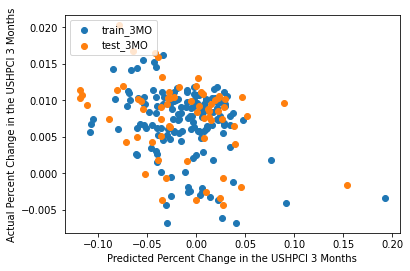

In [ ]:
# To check model performance
plt.scatter(mlpr_3MO.predict(X_train_3MO), y_train_3MO, label='train_3MO')
plt.scatter(mlpr_pred_3MO, y_test_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

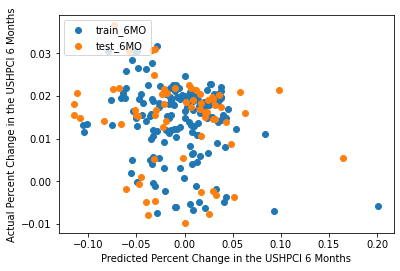

In [ ]:
# To check model performance
plt.scatter(mlpr_6MO.predict(X_train_6MO), y_train_6MO, label='train_6MO')
plt.scatter(mlpr_pred_6MO, y_test_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

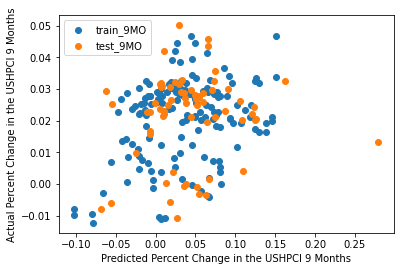

In [ ]:
# To check model performance
plt.scatter(mlpr_9MO.predict(X_train_9MO), y_train_9MO, label='train_9MO')
plt.scatter(mlpr_pred_9MO, y_test_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
X_train_pip_3MO, X_test_pip_3MO, y_train_pip_3MO, y_test_pip_3MO = train_test_split(X, y_3MO, test_size = 0.3, random_state = 43)
X_train_pip_6MO, X_test_pip_6MO, y_train_pip_6MO, y_test_pip_6MO = train_test_split(X, y_6MO, test_size = 0.3, random_state = 43)
X_train_pip_9MO, X_test_pip_9MO, y_train_pip_9MO, y_test_pip_9MO = train_test_split(X, y_9MO, test_size = 0.3, random_state = 43)

In [ ]:
step_1 = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=1)),
         ('lr', LinearRegression())]
pipeline_lr = Pipeline(step_1)

In [ ]:
lr_pip_3MO = pipeline_lr.fit(X_train_pip_3MO, y_train_pip_3MO)
lr_pip_pred_3MO = lr_pip_3MO.predict(X_test_pip_3MO)
lr_pip_6MO = pipeline_lr.fit(X_train_pip_6MO, y_train_pip_6MO)
lr_pip_pred_6MO = lr_pip_6MO.predict(X_test_pip_6MO)
lr_pip_9MO = pipeline_lr.fit(X_train_pip_9MO, y_train_pip_9MO)
lr_pip_pred_9MO = lr_pip_9MO.predict(X_test_pip_9MO)

In [ ]:
lr_pip_train_3MO_MSE = mean_squared_error(y_train_pip_3MO, lr_pip_3MO.predict(X_train_pip_3MO))
lr_pip_test_3MO_MSE = mean_squared_error(y_test_pip_3MO, lr_pip_pred_3MO)
lr_pip_train_3MO_r2 = r2_score(y_train_pip_3MO, lr_pip_3MO.predict(X_train_pip_3MO))
lr_pip_test_3MO_r2 = r2_score(y_test_pip_3MO, lr_pip_pred_3MO)

lr_pip_train_6MO_MSE = mean_squared_error(y_train_pip_6MO, lr_pip_6MO.predict(X_train_pip_6MO))
lr_pip_test_6MO_MSE = mean_squared_error(y_test_pip_6MO, lr_pip_pred_6MO)
lr_pip_train_6MO_r2 = r2_score(y_train_pip_6MO, lr_pip_6MO.predict(X_train_pip_6MO))
lr_pip_test_6MO_r2 = r2_score(y_test_pip_6MO, lr_pip_pred_6MO)

lr_pip_train_9MO_MSE = mean_squared_error(y_train_pip_9MO, lr_pip_9MO.predict(X_train_pip_9MO))
lr_pip_test_9MO_MSE = mean_squared_error(y_test_pip_9MO, lr_pip_pred_9MO)
lr_pip_train_9MO_r2 = r2_score(y_train_pip_9MO, lr_pip_9MO.predict(X_train_pip_9MO))
lr_pip_test_9MO_r2 = r2_score(y_test_pip_9MO, lr_pip_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % lr_pip_train_3MO_MSE)
print('Coefficient of determination for 3MO train set: %.3f' % lr_pip_train_3MO_r2)
print('Mean Squared Error for 3MO test set: %.10f' % lr_pip_test_3MO_MSE)
print('Coefficient of determination for 3MO test set: %.3f' % lr_pip_test_3MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % lr_pip_train_6MO_MSE)
print('Coefficient of determination for 6MO train set: %.3f' % lr_pip_train_6MO_r2)
print('Mean Squared Error for 6MO test set: %.3f' % lr_pip_test_6MO_MSE)
print('Coefficient of determination for 6MO test set: %.3f' % lr_pip_test_6MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % lr_pip_train_9MO_MSE)
print('Coefficient of determination for 9MO train set: %.3f' % lr_pip_train_9MO_r2)
print('Mean Squared Error for 9MO test set: %.3f' % lr_pip_test_9MO_MSE)
print('Coefficient of determination for 9MO test set: %.3f' % lr_pip_test_9MO_r2)

Mean Squared Error for 3MO train set: 0.0002351952
Coefficient of determination for 3MO train set: -9.937
Mean Squared Error for 3MO test set: 0.0000255479
Coefficient of determination for 3MO test set: 0.058
----------------------------------------------
Mean Squared Error for 6MO train set: 0.0001106451
Coefficient of determination for 6MO train set: -0.476
Mean Squared Error for 6MO test set: 0.000
Coefficient of determination for 6MO test set: 0.153
----------------------------------------------
Mean Squared Error for 9MO train set: 0.0001213916
Coefficient of determination for 9MO train set: 0.259
Mean Squared Error for 9MO test set: 0.000
Coefficient of determination for 9MO test set: 0.167


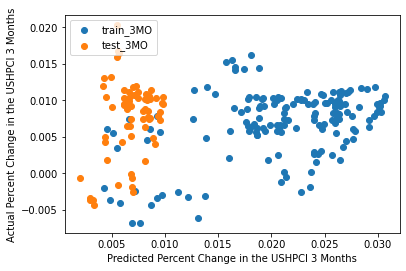

In [ ]:
# To check model performance
plt.scatter(lr_pip_3MO.predict(X_train_pip_3MO), y_train_pip_3MO, label='train_3MO')
plt.scatter(lr_pip_pred_3MO, y_test_pip_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

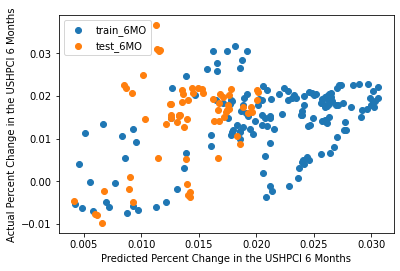

In [ ]:
# To check model performance
plt.scatter(lr_pip_6MO.predict(X_train_pip_6MO), y_train_pip_6MO, label='train_6MO')
plt.scatter(lr_pip_pred_6MO, y_test_pip_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

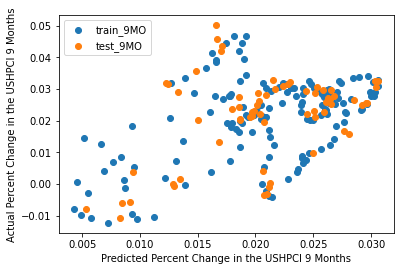

In [ ]:
# To check model performance
plt.scatter(lr_pip_9MO.predict(X_train_pip_9MO), y_train_pip_9MO, label='train_9MO')
plt.scatter(lr_pip_pred_9MO, y_test_pip_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Using grid search cross validation to select the best alpha
parameters_ridge = {'alpha':[0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]}
ridge = Ridge(random_state = 'SEED')
ridge_pip_cv_3MO = GridSearchCV(ridge, parameters_ridge, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_3MO, y_train_pip_3MO)
ridge_pip_cv_6MO = GridSearchCV(ridge, parameters_ridge, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_6MO, y_train_pip_6MO)
ridge_pip_cv_9MO = GridSearchCV(ridge, parameters_ridge, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_9MO, y_train_pip_9MO)

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(ridge_pip_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(ridge_pip_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(ridge_pip_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(ridge_pip_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(ridge_pip_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(ridge_pip_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is -0.1117
The best parameters for 3MO is {'alpha': 50}
-----------------------------------------
The best training R-Squared score for 6MO is -0.0232
The best parameters for 6MO is {'alpha': 50}
-----------------------------------------
The best training R-Squared score for 9MO is 0.1693
The best parameters for 9MO is {'alpha': 0.2}
-----------------------------------------


In [ ]:
step_2 = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=1)),
         ('ridge', Ridge(alpha = 50, random_state = 'SEED'))]
pipeline_ridge = Pipeline(step_2)

In [ ]:
ridge_pip_3MO = pipeline_ridge.fit(X_train_pip_3MO, y_train_pip_3MO)
ridge_pip_pred_3MO = ridge_pip_3MO.predict(X_test_pip_3MO)
ridge_pip_6MO = pipeline_ridge.fit(X_train_pip_6MO, y_train_pip_6MO)
ridge_pip_pred_6MO = ridge_pip_6MO.predict(X_test_pip_6MO)
ridge_pip_9MO = pipeline_ridge.fit(X_train_pip_9MO, y_train_pip_9MO)
ridge_pip_pred_9MO = ridge_pip_9MO.predict(X_test_pip_9MO)

In [ ]:
ridge_pip_train_3MO_MSE = mean_squared_error(y_train_pip_3MO, ridge_pip_3MO.predict(X_train_pip_3MO))
ridge_pip_test_3MO_MSE = mean_squared_error(y_test_pip_3MO, ridge_pip_pred_3MO)
ridge_pip_train_3MO_r2 = r2_score(y_train_pip_3MO, ridge_pip_3MO.predict(X_train_pip_3MO))
ridge_pip_test_3MO_r2 = r2_score(y_test_pip_3MO, ridge_pip_pred_3MO)

ridge_pip_train_6MO_MSE = mean_squared_error(y_train_pip_6MO, ridge_pip_6MO.predict(X_train_pip_6MO))
ridge_pip_test_6MO_MSE = mean_squared_error(y_test_pip_6MO, ridge_pip_pred_6MO)
ridge_pip_train_6MO_r2 = r2_score(y_train_pip_6MO, ridge_pip_6MO.predict(X_train_pip_6MO))
ridge_pip_test_6MO_r2 = r2_score(y_test_pip_6MO, ridge_pip_pred_6MO)

ridge_pip_train_9MO_MSE = mean_squared_error(y_train_pip_9MO, ridge_pip_9MO.predict(X_train_pip_9MO))
ridge_pip_test_9MO_MSE = mean_squared_error(y_test_pip_9MO, ridge_pip_pred_9MO)
ridge_pip_train_9MO_r2 = r2_score(y_train_pip_9MO, ridge_pip_9MO.predict(X_train_pip_9MO))
ridge_pip_test_9MO_r2 = r2_score(y_test_pip_9MO, ridge_pip_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % ridge_pip_train_3MO_MSE)
print('Coefficient of determination for 3MO train set: %.3f' % ridge_pip_train_3MO_r2)
print('Mean Squared Error for 3MO test set: %.10f' % ridge_pip_test_3MO_MSE)
print('Coefficient of determination for 3MO test set: %.3f' % ridge_pip_test_3MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % ridge_pip_train_6MO_MSE)
print('Coefficient of determination for 6MO train set: %.3f' % ridge_pip_train_6MO_r2)
print('Mean Squared Error for 6MO test set: %.3f' % ridge_pip_test_6MO_MSE)
print('Coefficient of determination for 6MO test set: %.3f' % ridge_pip_test_6MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % ridge_pip_train_9MO_MSE)
print('Coefficient of determination for 9MO train set: %.3f' % ridge_pip_train_9MO_r2)
print('Mean Squared Error for 9MO test set: %.10f' % ridge_pip_test_9MO_MSE)
print('Coefficient of determination for 9MO test set: %.3f' % ridge_pip_test_9MO_r2)

Mean Squared Error for 3MO train set: 0.0002331859
Coefficient of determination for 3MO train set: -9.844
Mean Squared Error for 3MO test set: 0.0000255074
Coefficient of determination for 3MO test set: 0.059
----------------------------------------------
Mean Squared Error for 6MO train set: 0.0001096079
Coefficient of determination for 6MO train set: -0.462
Mean Squared Error for 6MO test set: 0.000
Coefficient of determination for 6MO test set: 0.153
----------------------------------------------
Mean Squared Error for 9MO train set: 0.0001214440
Coefficient of determination for 9MO train set: 0.258
Mean Squared Error for 9MO test set: 0.0001510655
Coefficient of determination for 9MO test set: 0.168


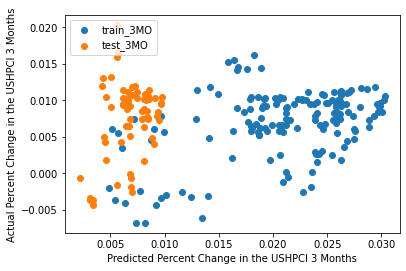

In [ ]:
# To check model performance
plt.scatter(ridge_pip_3MO.predict(X_train_pip_3MO), y_train_pip_3MO, label='train_3MO')
plt.scatter(ridge_pip_pred_3MO, y_test_pip_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

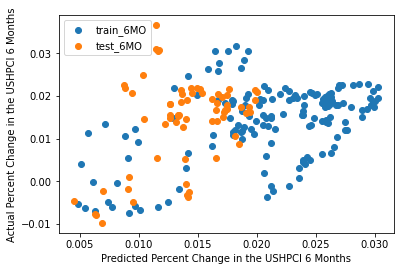

In [ ]:
# To check model performance
plt.scatter(ridge_pip_6MO.predict(X_train_pip_6MO), y_train_pip_6MO, label='train_6MO')
plt.scatter(ridge_pip_pred_6MO, y_test_pip_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

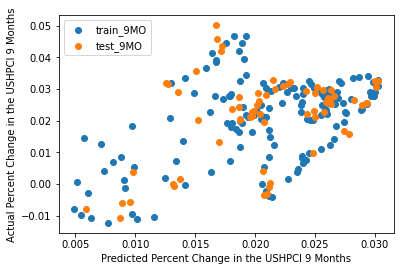

In [ ]:
# To check model performance
plt.scatter(ridge_pip_9MO.predict(X_train_pip_9MO), y_train_pip_9MO, label='train_9MO')
plt.scatter(ridge_pip_pred_9MO, y_test_pip_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Using grid search cross validation to select the best alpha
parameters_en = {'alpha': list(np.arange(0.01, 0.1, 0.01)),
           'l1_ratio': list(np.arange(0.1, 10, 0.5))}
en = ElasticNet(random_state = 43)
en_pip_cv_3MO = GridSearchCV(en, parameters_en, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_3MO, y_train_pip_3MO)
en_pip_cv_6MO = GridSearchCV(en, parameters_en, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_6MO, y_train_pip_6MO)
en_pip_cv_9MO = GridSearchCV(en, parameters_en, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_9MO, y_train_pip_9MO)

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(en_pip_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(en_pip_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(en_pip_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(en_pip_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(en_pip_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(en_pip_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is -0.0641
The best parameters for 3MO is {'alpha': 0.02, 'l1_ratio': 0.1}
-----------------------------------------
The best training R-Squared score for 6MO is -0.0061
The best parameters for 6MO is {'alpha': 0.01, 'l1_ratio': 0.6}
-----------------------------------------
The best training R-Squared score for 9MO is 0.1215
The best parameters for 9MO is {'alpha': 0.05, 'l1_ratio': 0.1}
-----------------------------------------


In [ ]:
step_3 = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=1)),
         ('en', ElasticNet(alpha = 0.05, l1_ratio = 0.1, random_state = 43))]
pipeline_en = Pipeline(step_3)

In [ ]:
en_pip_3MO = pipeline_en.fit(X_train_pip_3MO, y_train_pip_3MO)
en_pip_pred_3MO = en_pip_3MO.predict(X_test_pip_3MO)
en_pip_6MO = pipeline_en.fit(X_train_pip_6MO, y_train_pip_6MO)
en_pip_pred_6MO = en_pip_6MO.predict(X_test_pip_6MO)
en_pip_9MO = pipeline_en.fit(X_train_pip_9MO, y_train_pip_9MO)
en_pip_pred_9MO = en_pip_9MO.predict(X_test_pip_9MO)

In [ ]:
en_pip_train_3MO_MSE = mean_squared_error(y_train_pip_3MO, en_pip_3MO.predict(X_train_pip_3MO))
en_pip_test_3MO_MSE = mean_squared_error(y_test_pip_3MO, en_pip_pred_3MO)
en_pip_train_3MO_r2 = r2_score(y_train_pip_3MO, en_pip_3MO.predict(X_train_pip_3MO))
en_pip_test_3MO_r2 = r2_score(y_test_pip_3MO, en_pip_pred_3MO)

en_pip_train_6MO_MSE = mean_squared_error(y_train_pip_6MO, en_pip_6MO.predict(X_train_pip_6MO))
en_pip_test_6MO_MSE = mean_squared_error(y_test_pip_6MO, en_pip_pred_6MO)
en_pip_train_6MO_r2 = r2_score(y_train_pip_6MO, en_pip_6MO.predict(X_train_pip_6MO))
en_pip_test_6MO_r2 = r2_score(y_test_pip_6MO, en_pip_pred_6MO)

en_pip_train_9MO_MSE = mean_squared_error(y_train_pip_9MO, en_pip_9MO.predict(X_train_pip_9MO))
en_pip_test_9MO_MSE = mean_squared_error(y_test_pip_9MO, en_pip_pred_9MO)
en_pip_train_9MO_r2 = r2_score(y_train_pip_9MO, en_pip_9MO.predict(X_train_pip_9MO))
en_pip_test_9MO_r2 = r2_score(y_test_pip_9MO, en_pip_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % en_pip_train_3MO_MSE)
print('Coefficient of determination for 3MO train set: %.3f' % en_pip_train_3MO_r2)
print('Mean Squared Error for 3MO test set: %.10f' % en_pip_test_3MO_MSE)
print('Coefficient of determination for 3MO test set: %.3f' % en_pip_test_3MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % en_pip_train_6MO_MSE)
print('Coefficient of determination for 6MO train set: %.3f' % en_pip_train_6MO_r2)
print('Mean Squared Error for 6MO test set: %.3f' % en_pip_test_6MO_MSE)
print('Coefficient of determination for 6MO test set: %.3f' % en_pip_test_6MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % en_pip_train_9MO_MSE)
print('Coefficient of determination for 9MO train set: %.3f' % en_pip_train_9MO_r2)
print('Mean Squared Error for 9MO test set: %.3f' % en_pip_test_9MO_MSE)
print('Coefficient of determination for 9MO test set: %.3f' % en_pip_test_9MO_r2)

Mean Squared Error for 3MO train set: 0.0002227103
Coefficient of determination for 3MO train set: -9.357
Mean Squared Error for 3MO test set: 0.0000269011
Coefficient of determination for 3MO test set: 0.008
----------------------------------------------
Mean Squared Error for 6MO train set: 0.0001054265
Coefficient of determination for 6MO train set: -0.406
Mean Squared Error for 6MO test set: 0.000
Coefficient of determination for 6MO test set: 0.124
----------------------------------------------
Mean Squared Error for 9MO train set: 0.0001243162
Coefficient of determination for 9MO train set: 0.241
Mean Squared Error for 9MO test set: 0.000
Coefficient of determination for 9MO test set: 0.161


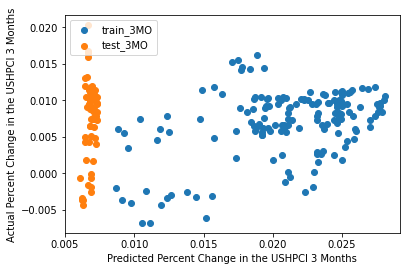

In [ ]:
# To check model performance
plt.scatter(en_pip_3MO.predict(X_train_pip_3MO), y_train_pip_3MO, label='train_3MO')
plt.scatter(en_pip_pred_3MO, y_test_pip_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

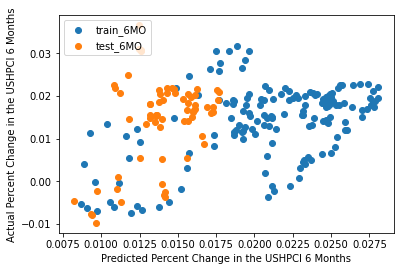

In [ ]:
# To check model performance
plt.scatter(en_pip_6MO.predict(X_train_pip_6MO), y_train_pip_6MO, label='train_6MO')
plt.scatter(en_pip_pred_6MO, y_test_pip_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

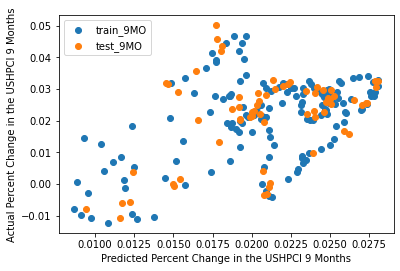

In [ ]:
# To check model performance
plt.scatter(en_pip_9MO.predict(X_train_pip_9MO), y_train_pip_9MO, label='train_9MO')
plt.scatter(en_pip_pred_9MO, y_test_pip_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Using grid search cross validation to select the best alpha
parameters_svr = {'gamma': list(np.arange(0.01, 10, 0.5)),
           'C': list(np.arange(0.01, 1, 0.5)),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svr = SVR()
svr_pip_cv_3MO = GridSearchCV(svr, parameters_svr, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_3MO, y_train_pip_3MO)
svr_pip_cv_6MO = GridSearchCV(svr, parameters_svr, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_6MO, y_train_pip_6MO)
svr_pip_cv_9MO = GridSearchCV(svr, parameters_svr, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_9MO, y_train_pip_9MO)

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(svr_pip_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(svr_pip_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(svr_pip_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(svr_pip_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(svr_pip_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(svr_pip_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is -0.6004
The best parameters for 3MO is {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
-----------------------------------------
The best training R-Squared score for 6MO is -0.2471
The best parameters for 6MO is {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
-----------------------------------------
The best training R-Squared score for 9MO is -0.2556
The best parameters for 9MO is {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
-----------------------------------------


In [ ]:
step_4 = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=1)),
         ('svr', SVR(C = 0.01, gamma = 0.01, kernel='linear'))]
pipeline_svr = Pipeline(step_4)

In [ ]:
svr_pip_3MO = pipeline_svr.fit(X_train_pip_3MO, y_train_pip_3MO)
svr_pip_pred_3MO = svr_pip_3MO.predict(X_test_pip_3MO)
svr_pip_6MO = pipeline_svr.fit(X_train_pip_6MO, y_train_pip_6MO)
svr_pip_pred_6MO = svr_pip_6MO.predict(X_test_pip_6MO)
svr_pip_9MO = pipeline_svr.fit(X_train_pip_9MO, y_train_pip_9MO)
svr_pip_pred_9MO = svr_pip_9MO.predict(X_test_pip_9MO)

In [ ]:
svr_pip_train_3MO_MSE = mean_squared_error(y_train_pip_3MO, svr_pip_3MO.predict(X_train_pip_3MO))
svr_pip_test_3MO_MSE = mean_squared_error(y_test_pip_3MO, svr_pip_pred_3MO)
svr_pip_train_3MO_r2 = r2_score(y_train_pip_3MO, svr_pip_3MO.predict(X_train_pip_3MO))
svr_pip_test_3MO_r2 = r2_score(y_test_pip_3MO, svr_pip_pred_3MO)

svr_pip_train_6MO_MSE = mean_squared_error(y_train_pip_6MO, svr_pip_6MO.predict(X_train_pip_6MO))
svr_pip_test_6MO_MSE = mean_squared_error(y_test_pip_6MO, svr_pip_pred_6MO)
svr_pip_train_6MO_r2 = r2_score(y_train_pip_6MO, svr_pip_6MO.predict(X_train_pip_6MO))
svr_pip_test_6MO_r2 = r2_score(y_test_pip_6MO, svr_pip_pred_6MO)

svr_pip_train_9MO_MSE = mean_squared_error(y_train_pip_9MO, svr_pip_9MO.predict(X_train_pip_9MO))
svr_pip_test_9MO_MSE = mean_squared_error(y_test_pip_9MO, svr_pip_pred_9MO)
svr_pip_train_9MO_r2 = r2_score(y_train_pip_9MO, svr_pip_9MO.predict(X_train_pip_9MO))
svr_pip_test_9MO_r2 = r2_score(y_test_pip_9MO, svr_pip_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % svr_pip_train_3MO_MSE)
print('Coefficient of determination for 3MO train set: %.3f' % svr_pip_train_3MO_r2)
print('Mean Squared Error for 3MO test set: %.10f' % svr_pip_test_3MO_MSE)
print('Coefficient of determination for 3MO test set: %.3f' % svr_pip_test_3MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % svr_pip_train_6MO_MSE)
print('Coefficient of determination for 6MO train set: %.3f' % svr_pip_train_6MO_r2)
print('Mean Squared Error for 6MO test set: %.3f' % svr_pip_test_6MO_MSE)
print('Coefficient of determination for 6MO test set: %.3f' % svr_pip_test_6MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % svr_pip_train_9MO_MSE)
print('Coefficient of determination for 9MO train set: %.3f' % svr_pip_train_9MO_r2)
print('Mean Squared Error for 9MO test set: %.3f' % svr_pip_test_9MO_MSE)
print('Coefficient of determination for 9MO test set: %.3f' % svr_pip_test_9MO_r2)

Mean Squared Error for 3MO train set: 0.0001301666
Coefficient of determination for 3MO train set: -5.053
Mean Squared Error for 3MO test set: 0.0000357198
Coefficient of determination for 3MO test set: -0.318
----------------------------------------------
Mean Squared Error for 6MO train set: 0.0000854350
Coefficient of determination for 6MO train set: -0.139
Mean Squared Error for 6MO test set: 0.000
Coefficient of determination for 6MO test set: -0.038
----------------------------------------------
Mean Squared Error for 9MO train set: 0.0001769231
Coefficient of determination for 9MO train set: -0.080
Mean Squared Error for 9MO test set: 0.000
Coefficient of determination for 9MO test set: -0.097


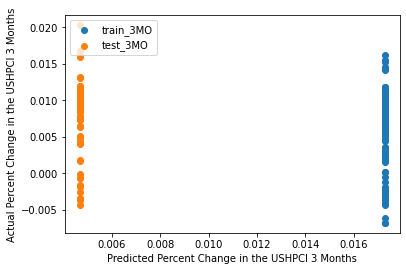

In [ ]:
# To check model performance
plt.scatter(svr_pip_3MO.predict(X_train_pip_3MO), y_train_pip_3MO, label='train_3MO')
plt.scatter(svr_pip_pred_3MO, y_test_pip_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

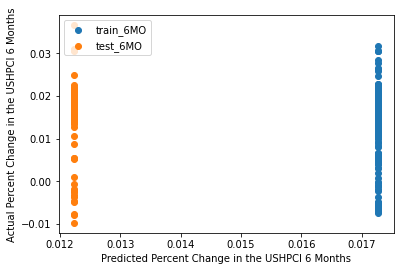

In [ ]:
# To check model performance
plt.scatter(svr_pip_6MO.predict(X_train_pip_6MO), y_train_pip_6MO, label='train_6MO')
plt.scatter(svr_pip_pred_6MO, y_test_pip_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

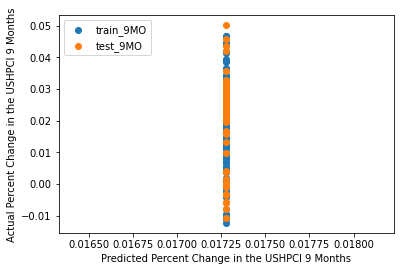

In [ ]:
# To check model performance
plt.scatter(svr_pip_9MO.predict(X_train_pip_9MO), y_train_pip_9MO, label='train_9MO')
plt.scatter(svr_pip_pred_9MO, y_test_pip_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Using grid search cross validation to select the best max_depth and max_features
parameters_tree = {'max_depth': np.arange(2, 24, 2),
              'max_features': ["auto", "sqrt", "log2"]}
tree = DecisionTreeRegressor(random_state = 43)

tree_pip_cv_3MO = GridSearchCV(tree, parameters_tree, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_3MO, y_train_pip_3MO)
tree_pip_cv_6MO = GridSearchCV(tree, parameters_tree, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_6MO, y_train_pip_6MO)
tree_pip_cv_9MO = GridSearchCV(tree, parameters_tree, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_9MO, y_train_pip_9MO)

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(tree_pip_cv_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(tree_pip_cv_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(tree_pip_cv_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(tree_pip_cv_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(tree_pip_cv_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(tree_pip_cv_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is -0.1926
The best parameters for 3MO is {'max_depth': 2, 'max_features': 'auto'}
-----------------------------------------
The best training R-Squared score for 6MO is 0.091
The best parameters for 6MO is {'max_depth': 2, 'max_features': 'auto'}
-----------------------------------------
The best training R-Squared score for 9MO is 0.3297
The best parameters for 9MO is {'max_depth': 6, 'max_features': 'sqrt'}
-----------------------------------------


In [ ]:
step_5 = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=1)),
         ('tree', DecisionTreeRegressor(max_depth = 2, max_features = 'auto', random_state = 43))]
pipeline_tree = Pipeline(step_5)

In [ ]:
tree_pip_3MO = pipeline_tree.fit(X_train_pip_3MO, y_train_pip_3MO)
tree_pip_pred_3MO = tree_pip_3MO.predict(X_test_pip_3MO)
tree_pip_6MO = pipeline_tree.fit(X_train_pip_6MO, y_train_pip_6MO)
tree_pip_pred_6MO = tree_pip_6MO.predict(X_test_pip_6MO)
tree_pip_9MO = pipeline_tree.fit(X_train_pip_9MO, y_train_pip_9MO)
tree_pip_pred_9MO = tree_pip_9MO.predict(X_test_pip_9MO)

In [ ]:
tree_pip_train_3MO_MSE = mean_squared_error(y_train_pip_3MO, tree_pip_3MO.predict(X_train_pip_3MO))
tree_pip_test_3MO_MSE = mean_squared_error(y_test_pip_3MO, tree_pip_pred_3MO)
tree_pip_train_3MO_r2 = r2_score(y_train_pip_3MO, tree_pip_3MO.predict(X_train_pip_3MO))
tree_pip_test_3MO_r2 = r2_score(y_test_pip_3MO, tree_pip_pred_3MO)

tree_pip_train_6MO_MSE = mean_squared_error(y_train_pip_6MO, tree_pip_6MO.predict(X_train_pip_6MO))
tree_pip_test_6MO_MSE = mean_squared_error(y_test_pip_6MO, tree_pip_pred_6MO)
tree_pip_train_6MO_r2 = r2_score(y_train_pip_6MO, tree_pip_6MO.predict(X_train_pip_6MO))
tree_pip_test_6MO_r2 = r2_score(y_test_pip_6MO, tree_pip_pred_6MO)

tree_pip_train_9MO_MSE = mean_squared_error(y_train_pip_9MO, tree_pip_9MO.predict(X_train_pip_9MO))
tree_pip_test_9MO_MSE = mean_squared_error(y_test_pip_9MO, tree_pip_pred_9MO)
tree_pip_train_9MO_r2 = r2_score(y_train_pip_9MO, tree_pip_9MO.predict(X_train_pip_9MO))
tree_pip_test_9MO_r2 = r2_score(y_test_pip_9MO, tree_pip_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % tree_pip_train_3MO_MSE)
print('Coefficient of determination for 3MO train set: %.3f' % tree_pip_train_3MO_r2)
print('Mean Squared Error for 3MO test set: %.10f' % tree_pip_test_3MO_MSE)
print('Coefficient of determination for 3MO test set: %.3f' % tree_pip_test_3MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % tree_pip_train_6MO_MSE)
print('Coefficient of determination for 6MO train set: %.3f' % tree_pip_train_6MO_r2)
print('Mean Squared Error for 6MO test set: %.3f' % tree_pip_test_6MO_MSE)
print('Coefficient of determination for 6MO test set: %.3f' % tree_pip_test_6MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % tree_pip_train_9MO_MSE)
print('Coefficient of determination for 9MO train set: %.3f' % tree_pip_train_9MO_r2)
print('Mean Squared Error for 9MO test set: %.3f' % tree_pip_test_9MO_MSE)
print('Coefficient of determination for 9MO test set: %.3f' % tree_pip_test_9MO_r2)

Mean Squared Error for 3MO train set: 0.0002429915
Coefficient of determination for 3MO train set: -10.300
Mean Squared Error for 3MO test set: 0.0000252125
Coefficient of determination for 3MO test set: 0.070
----------------------------------------------
Mean Squared Error for 6MO train set: 0.0001010777
Coefficient of determination for 6MO train set: -0.348
Mean Squared Error for 6MO test set: 0.000
Coefficient of determination for 6MO test set: 0.234
----------------------------------------------
Mean Squared Error for 9MO train set: 0.0000977757
Coefficient of determination for 9MO train set: 0.403
Mean Squared Error for 9MO test set: 0.000
Coefficient of determination for 9MO test set: 0.194


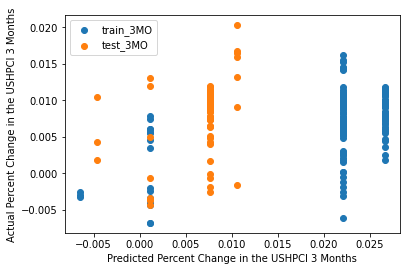

In [ ]:
# To check model performance
plt.scatter(tree_pip_3MO.predict(X_train_pip_3MO), y_train_pip_3MO, label='train_3MO')
plt.scatter(tree_pip_pred_3MO, y_test_pip_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

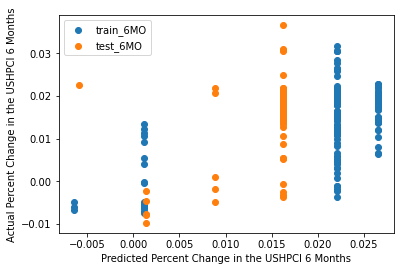

In [ ]:
# To check model performance
plt.scatter(tree_pip_6MO.predict(X_train_pip_6MO), y_train_pip_6MO, label='train_6MO')
plt.scatter(tree_pip_pred_6MO, y_test_pip_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

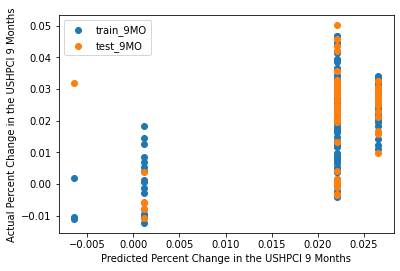

In [ ]:
# To check model performance
plt.scatter(tree_pip_9MO.predict(X_train_pip_9MO), y_train_pip_9MO, label='train_9MO')
plt.scatter(tree_pip_pred_9MO, y_test_pip_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Using grid search cross validation to select the best parameters
parameters_rf = {'n_estimators': [100],
            'max_depth': np.arange(2, 12, 2),
            'min_samples_split': [2, 3, 5],
            'max_features': ["auto", "sqrt", "log2"]}
rf = RandomForestRegressor(random_state = 43)

rf_cv_pip_3MO = GridSearchCV(rf, parameters_rf, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_3MO, y_train_pip_3MO)
rf_cv_pip_6MO = GridSearchCV(rf, parameters_rf, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_6MO, y_train_pip_6MO)
rf_cv_pip_9MO = GridSearchCV(rf, parameters_rf, scoring = 'r2', cv = 10, n_jobs = -1).fit(X_train_pip_9MO, y_train_pip_9MO)

In [ ]:
print('The best training R-Squared score for 3MO is {}'.format(np.round(rf_cv_pip_3MO.best_score_, 4)))
print('The best parameters for 3MO is {}'.format(rf_cv_pip_3MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 6MO is {}'.format(np.round(rf_cv_pip_6MO.best_score_, 4)))
print('The best parameters for 6MO is {}'.format(rf_cv_pip_6MO.best_params_))
print("-----------------------------------------")
print('The best training R-Squared score for 9MO is {}'.format(np.round(rf_cv_pip_9MO.best_score_, 4)))
print('The best parameters for 9MO is {}'.format(rf_cv_pip_9MO.best_params_))
print("-----------------------------------------")

The best training R-Squared score for 3MO is 0.1119
The best parameters for 3MO is {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
-----------------------------------------
The best training R-Squared score for 6MO is 0.3566
The best parameters for 6MO is {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
-----------------------------------------
The best training R-Squared score for 9MO is 0.5531
The best parameters for 9MO is {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
-----------------------------------------


In [ ]:
step_6 = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=1)),
         ('rf', RandomForestRegressor(n_estimators=100, max_depth = 8, max_features = 'sqrt', min_samples_split=5, random_state = 43))]
pipeline_rf = Pipeline(step_6)

In [ ]:
rf_pip_3MO = pipeline_rf.fit(X_train_pip_3MO, y_train_pip_3MO)
rf_pip_pred_3MO = rf_pip_3MO.predict(X_test_pip_3MO)
rf_pip_6MO = pipeline_rf.fit(X_train_pip_6MO, y_train_pip_6MO)
rf_pip_pred_6MO = rf_pip_6MO.predict(X_test_pip_6MO)
rf_pip_9MO = pipeline_rf.fit(X_train_pip_9MO, y_train_pip_9MO)
rf_pip_pred_9MO = rf_pip_9MO.predict(X_test_pip_9MO)

In [ ]:
rf_pip_train_3MO_MSE = mean_squared_error(y_train_pip_3MO, rf_pip_3MO.predict(X_train_pip_3MO))
rf_pip_test_3MO_MSE = mean_squared_error(y_test_pip_3MO, rf_pip_pred_3MO)
rf_pip_train_3MO_r2 = r2_score(y_train_pip_3MO, rf_pip_3MO.predict(X_train_pip_3MO))
rf_pip_test_3MO_r2 = r2_score(y_test_pip_3MO, rf_pip_pred_3MO)

rf_pip_train_6MO_MSE = mean_squared_error(y_train_pip_6MO, rf_pip_6MO.predict(X_train_pip_6MO))
rf_pip_test_6MO_MSE = mean_squared_error(y_test_pip_6MO, rf_pip_pred_6MO)
rf_pip_train_6MO_r2 = r2_score(y_train_pip_6MO, rf_pip_6MO.predict(X_train_pip_6MO))
rf_pip_test_6MO_r2 = r2_score(y_test_pip_6MO, rf_pip_pred_6MO)

rf_pip_train_9MO_MSE = mean_squared_error(y_train_pip_9MO, rf_pip_9MO.predict(X_train_pip_9MO))
rf_pip_test_9MO_MSE = mean_squared_error(y_test_pip_9MO, rf_pip_pred_9MO)
rf_pip_train_9MO_r2 = r2_score(y_train_pip_9MO, rf_pip_9MO.predict(X_train_pip_9MO))
rf_pip_test_9MO_r2 = r2_score(y_test_pip_9MO, rf_pip_pred_9MO)

In [ ]:
print('Mean Squared Error for 3MO train set: %.10f' % rf_pip_train_3MO_MSE)
print('Coefficient of determination for 3MO train set: %.3f' % rf_pip_train_3MO_r2)
print('Mean Squared Error for 3MO test set: %.10f' % rf_pip_test_3MO_MSE)
print('Coefficient of determination for 3MO test set: %.3f' % rf_pip_test_3MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 6MO train set: %.10f' % rf_pip_train_6MO_MSE)
print('Coefficient of determination for 6MO train set: %.3f' % rf_pip_train_6MO_r2)
print('Mean Squared Error for 6MO test set: %.3f' % rf_pip_test_6MO_MSE)
print('Coefficient of determination for 6MO test set: %.3f' % rf_pip_test_6MO_r2)
print("----------------------------------------------")
print('Mean Squared Error for 9MO train set: %.10f' % rf_pip_train_9MO_MSE)
print('Coefficient of determination for 9MO train set: %.3f' % rf_pip_train_9MO_r2)
print('Mean Squared Error for 9MO test set: %.3f' % rf_pip_test_9MO_MSE)
print('Coefficient of determination for 9MO test set: %.3f' % rf_pip_test_9MO_r2)

Mean Squared Error for 3MO train set: 0.0002389102
Coefficient of determination for 3MO train set: -10.110
Mean Squared Error for 3MO test set: 0.0000213812
Coefficient of determination for 3MO test set: 0.211
----------------------------------------------
Mean Squared Error for 6MO train set: 0.0000740688
Coefficient of determination for 6MO train set: 0.012
Mean Squared Error for 6MO test set: 0.000
Coefficient of determination for 6MO test set: 0.370
----------------------------------------------
Mean Squared Error for 9MO train set: 0.0000454463
Coefficient of determination for 9MO train set: 0.723
Mean Squared Error for 9MO test set: 0.000
Coefficient of determination for 9MO test set: 0.411


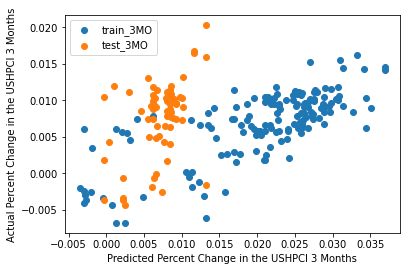

In [ ]:
# To check model performance
plt.scatter(rf_pip_3MO.predict(X_train_pip_3MO), y_train_pip_3MO, label='train_3MO')
plt.scatter(rf_pip_pred_3MO, y_test_pip_3MO, label='test_3MO')
plt.xlabel('Predicted Percent Change in the USHPCI 3 Months')
plt.ylabel('Actual Percent Change in the USHPCI 3 Months')
plt.legend(loc = 'upper left')
plt.show()

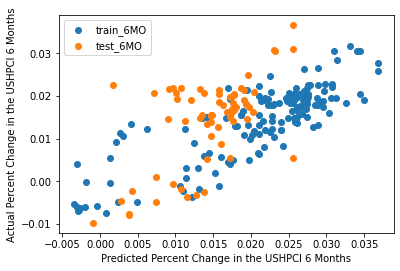

In [ ]:
# To check model performance
plt.scatter(rf_pip_6MO.predict(X_train_pip_6MO), y_train_pip_6MO, label='train_6MO')
plt.scatter(rf_pip_pred_6MO, y_test_pip_6MO, label='test_6MO')
plt.xlabel('Predicted Percent Change in the USHPCI 6 Months')
plt.ylabel('Actual Percent Change in the USHPCI 6 Months')
plt.legend(loc = 'upper left')
plt.show()

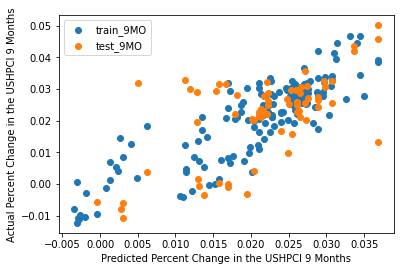

In [ ]:
# To check model performance
plt.scatter(rf_pip_9MO.predict(X_train_pip_9MO), y_train_pip_9MO, label='train_9MO')
plt.scatter(rf_pip_pred_9MO, y_test_pip_9MO, label='test_9MO')
plt.xlabel('Predicted Percent Change in the USHPCI 9 Months')
plt.ylabel('Actual Percent Change in the USHPCI 9 Months')
plt.legend(loc = 'upper left')
plt.show()